<a href="https://colab.research.google.com/github/ikramulhossain/Aiyourvadik/blob/main/final_novel_drug_candidate_(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas numpy matplotlib seaborn rdkit-pypi

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi


MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES

STEP 1: DATA PROCESSING
Loading dataset...
Dataset shape: (421, 27)
Missing values per column:
medicineNname                            0
ActiveIngredient                         0
SMILES                                   0
Target Protein / Enzyme                  0
Protein Binding Affinity (Kd/IC50/Ki)    0
Efficacy %                               0
Toxicity                                 0
Mechanism of Action                      0
Absorption                               0
Distribution                             0
Metabolism                               0
Excretion                                0
Bioavailability                          0
Bioavailability/Key_Notes                0
Stability                                0
Dose_Range                               0
Selectivity                              0
Potency                                  0
Agonist/Antagonist Activity              0
Side Effects                       

[08:30:46] SMILES Parse Error: syntax error while parsing: C(C(COP(=O)(O)O)O)O.[Na].[Na]?
[08:30:46] SMILES Parse Error: check for mistakes around position 30:
[08:30:46] O)(O)O)O)O.[Na].[Na]?
[08:30:46] ~~~~~~~~~~~~~~~~~~~~^
[08:30:46] SMILES Parse Error: Failed parsing SMILES 'C(C(COP(=O)(O)O)O)O.[Na].[Na]?' for input: 'C(C(COP(=O)(O)O)O)O.[Na].[Na]?'


Added 20 molecular features
Created target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

Processed dataset shape: (405, 96)
Numerical features: 27
Categorical features: 40
Target variables: ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric']

STEP 2: MACHINE LEARNING MODELING

Training models for: is_diabetes_drug
Problem type: classification
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117284 -> initscore=-2.018406
[LightGBM] [Info] Start training f

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


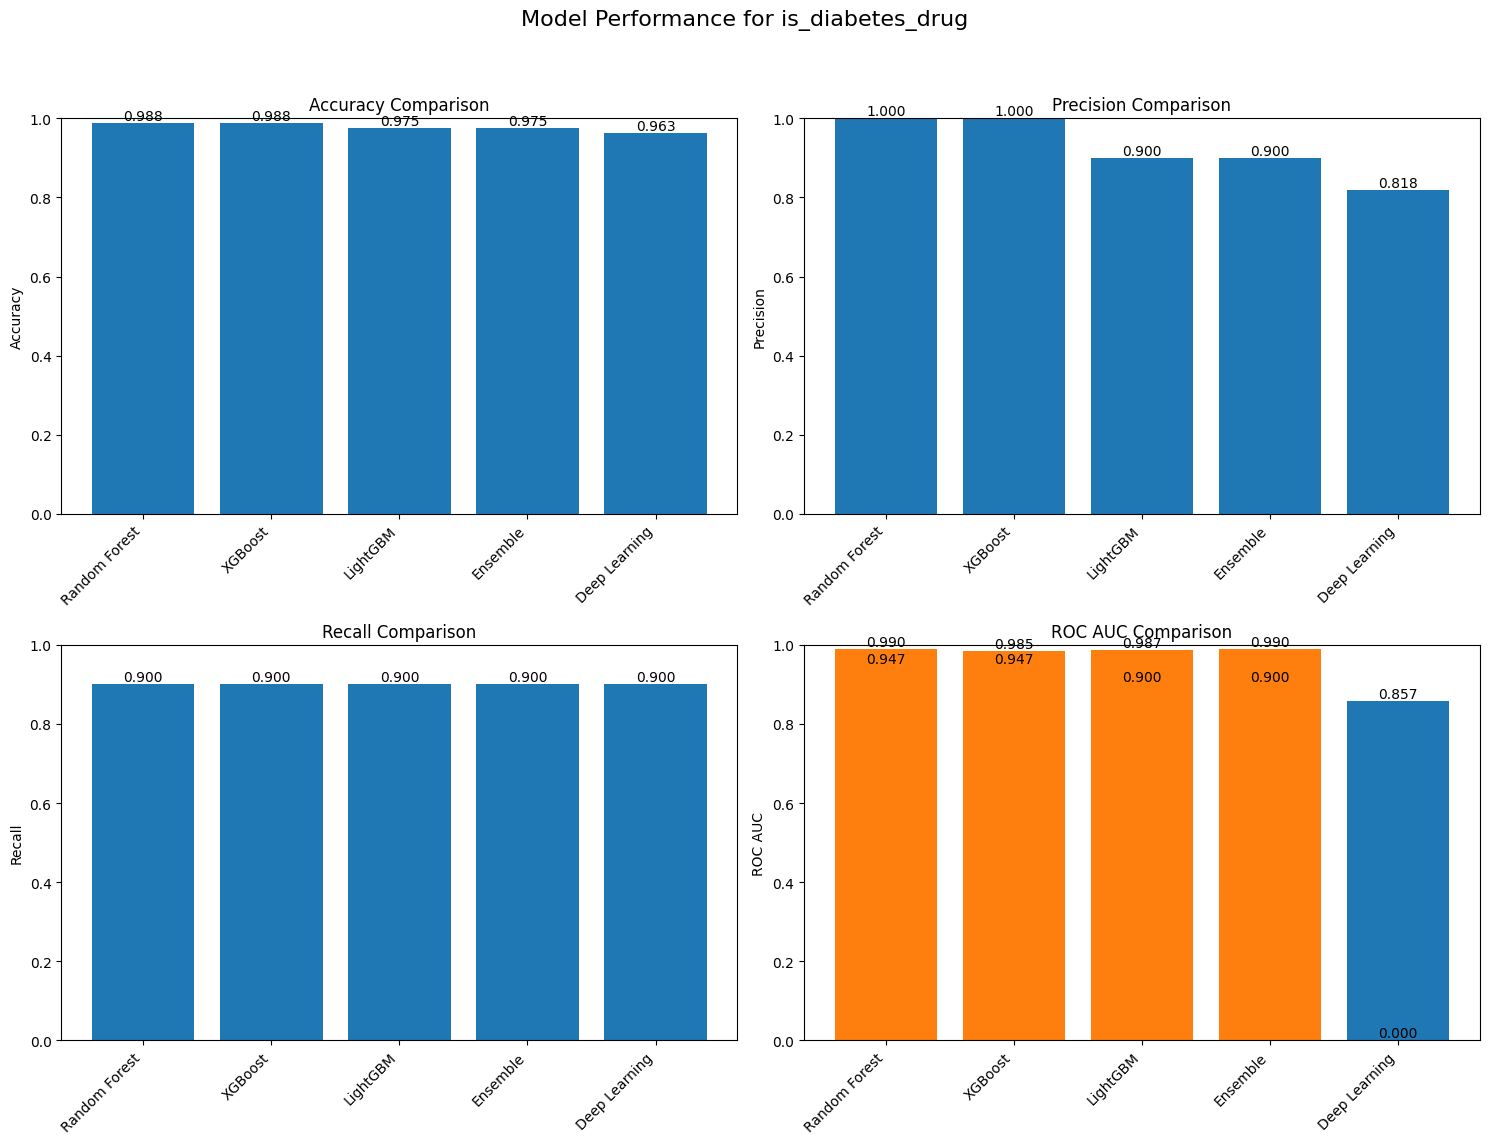

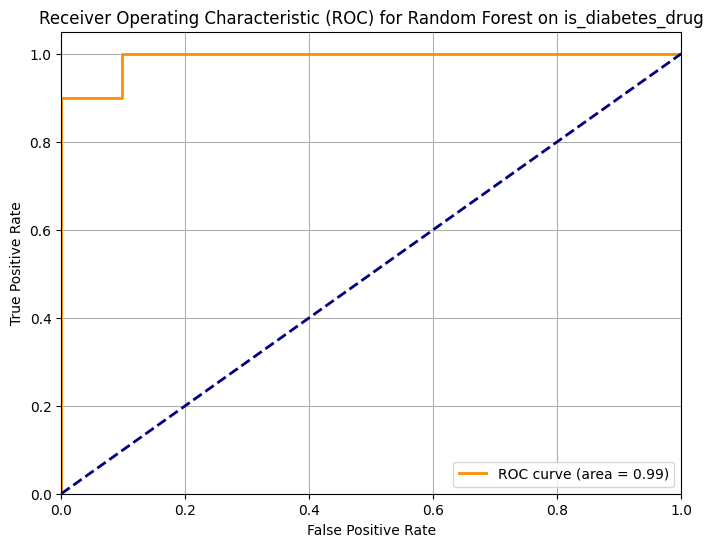

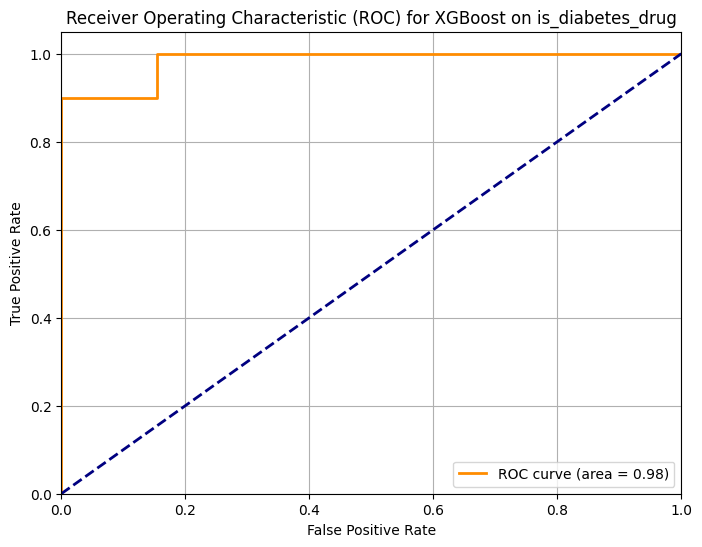

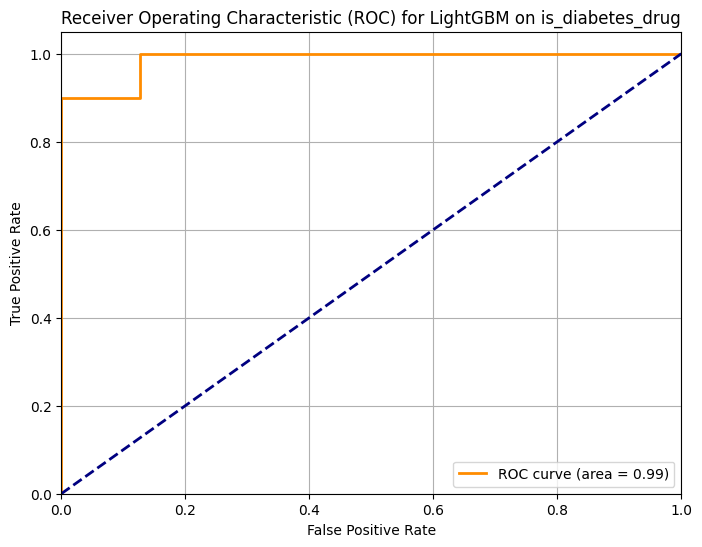

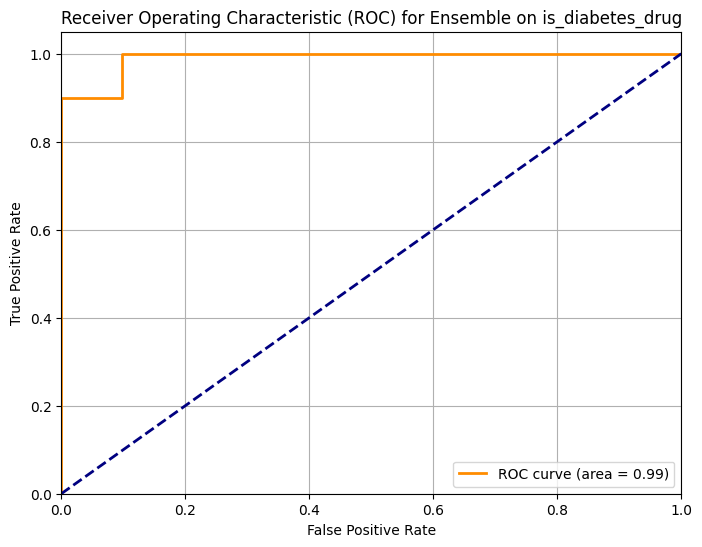

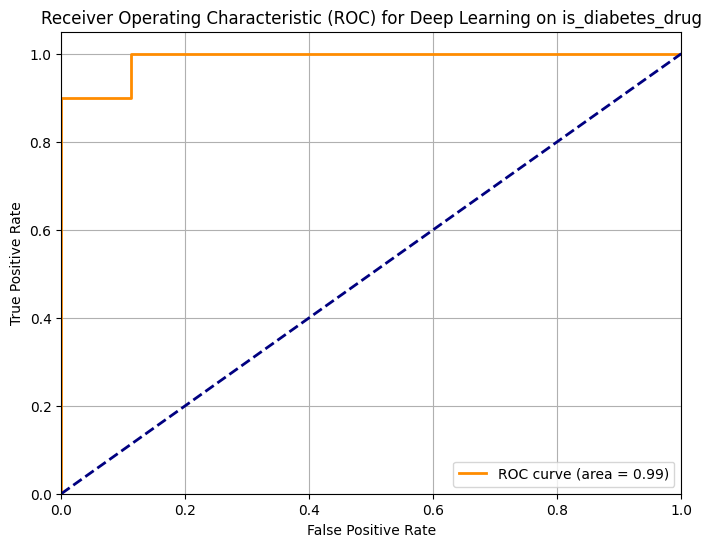

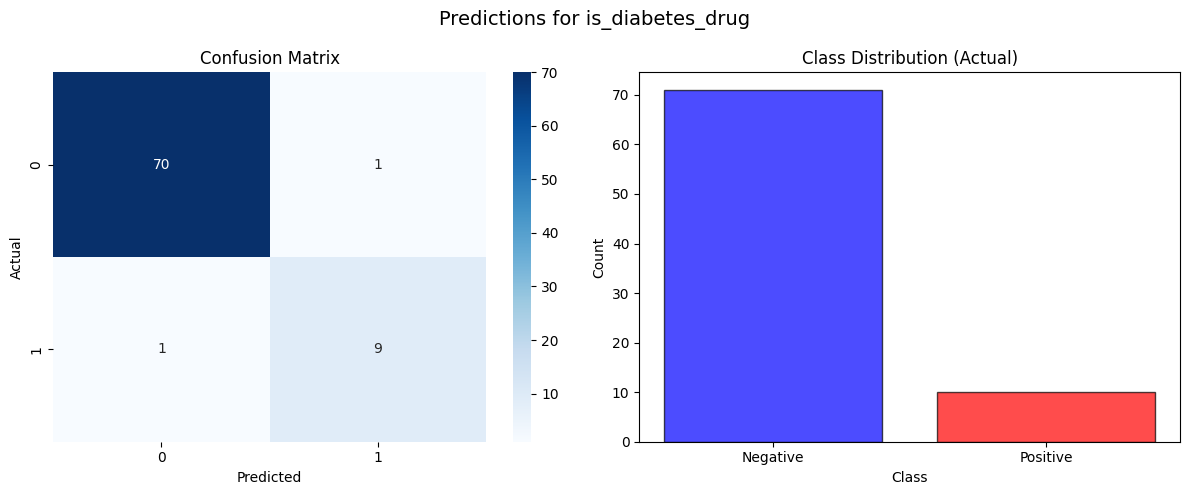

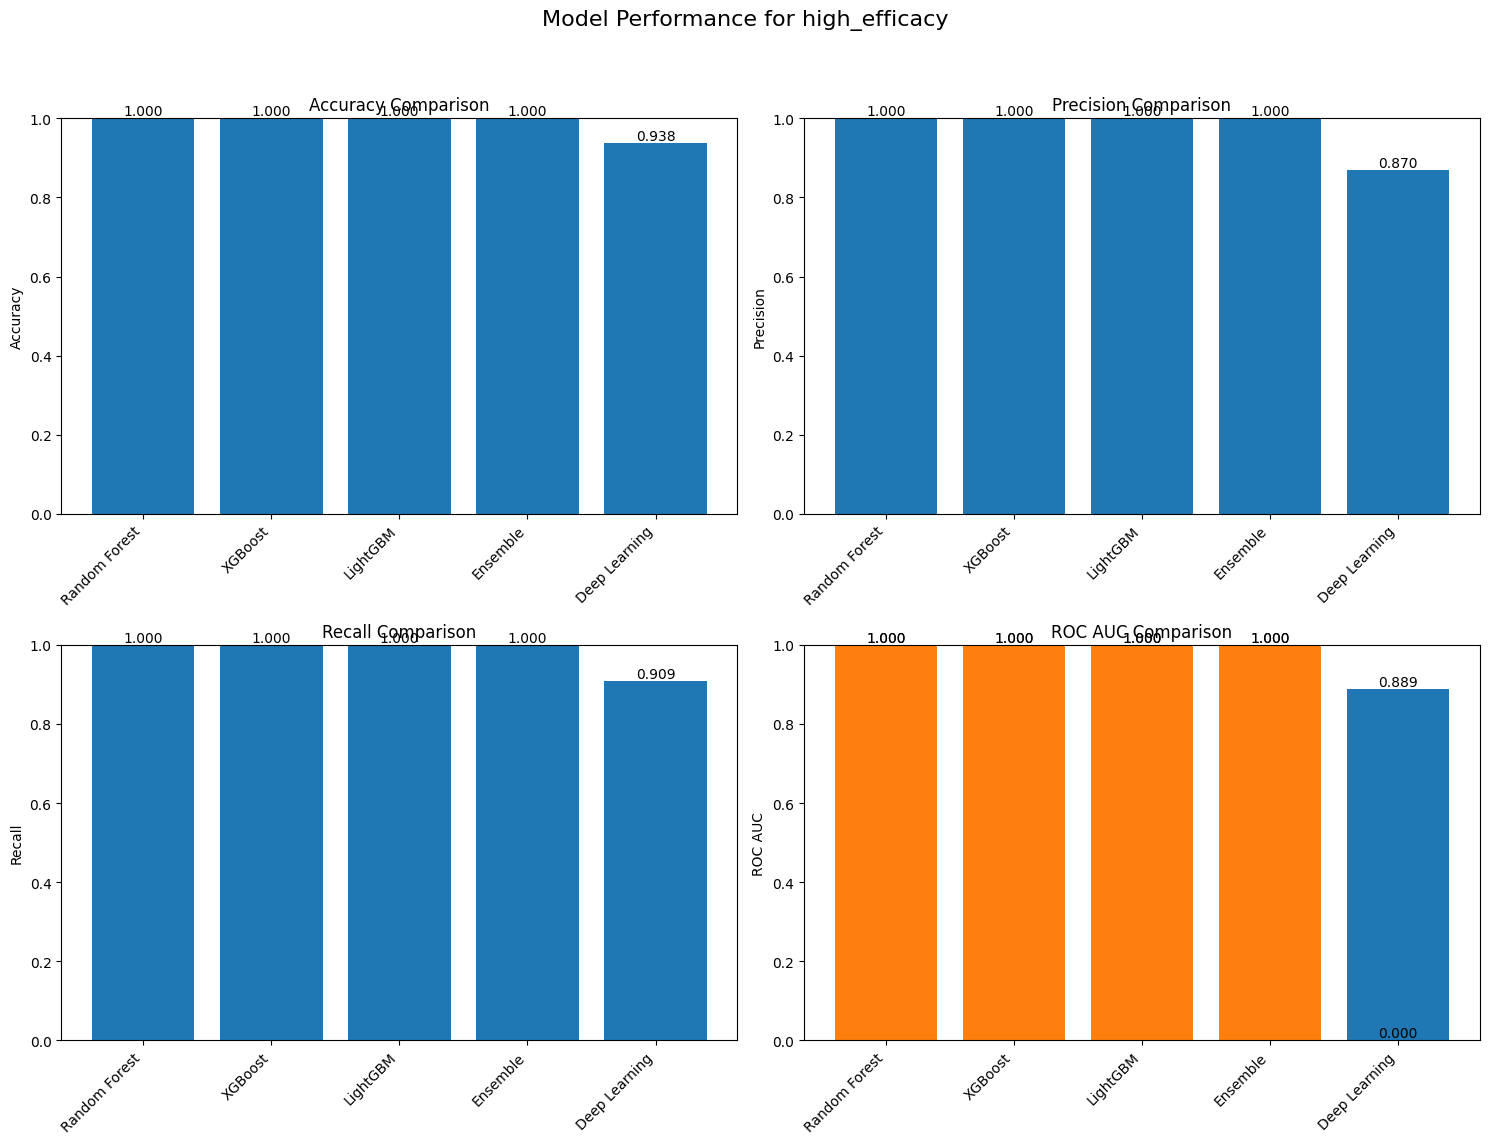

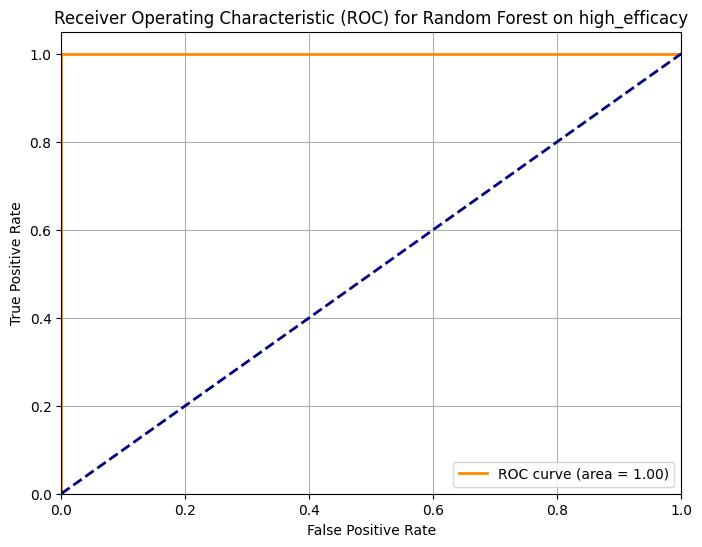

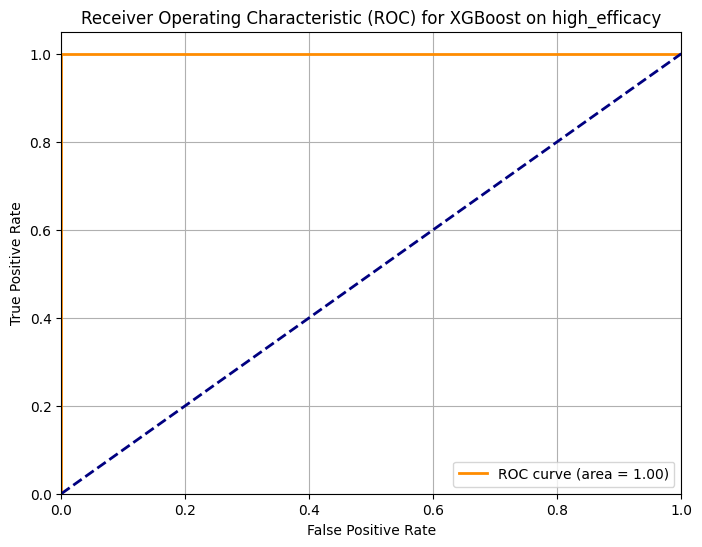

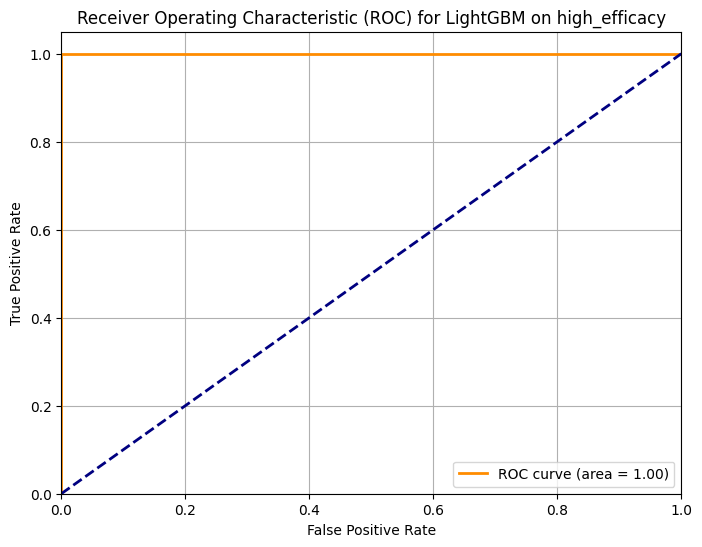

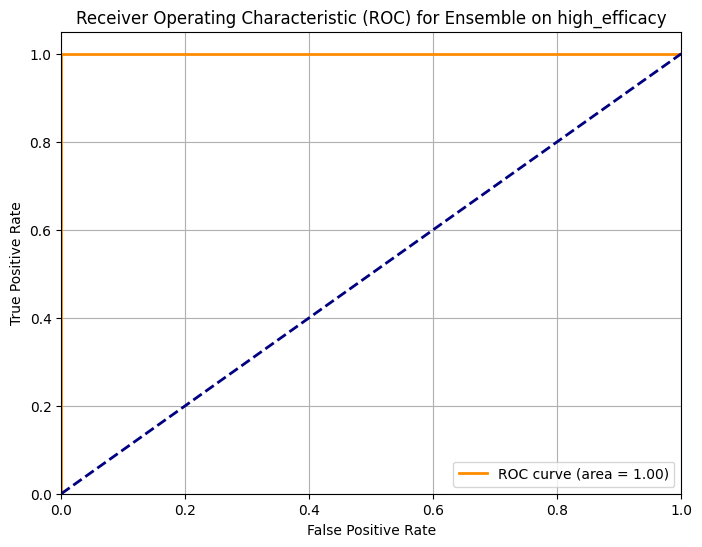

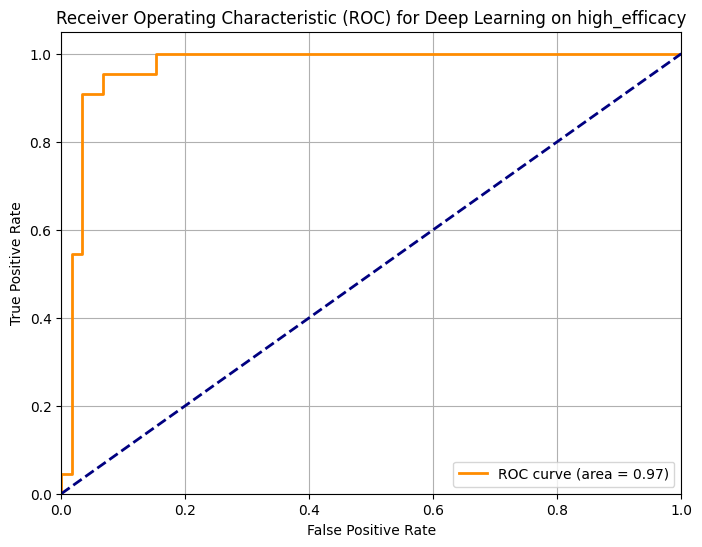

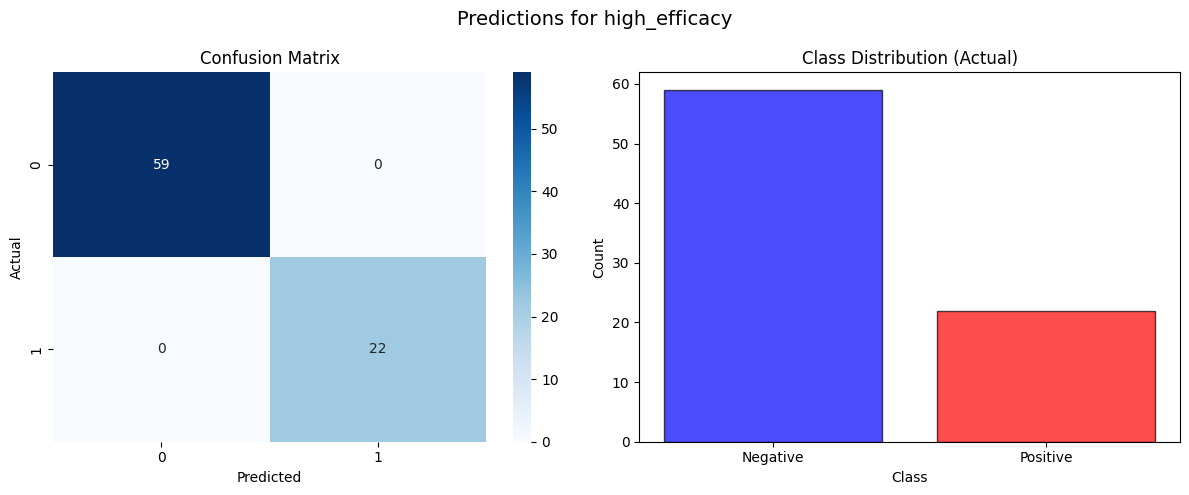

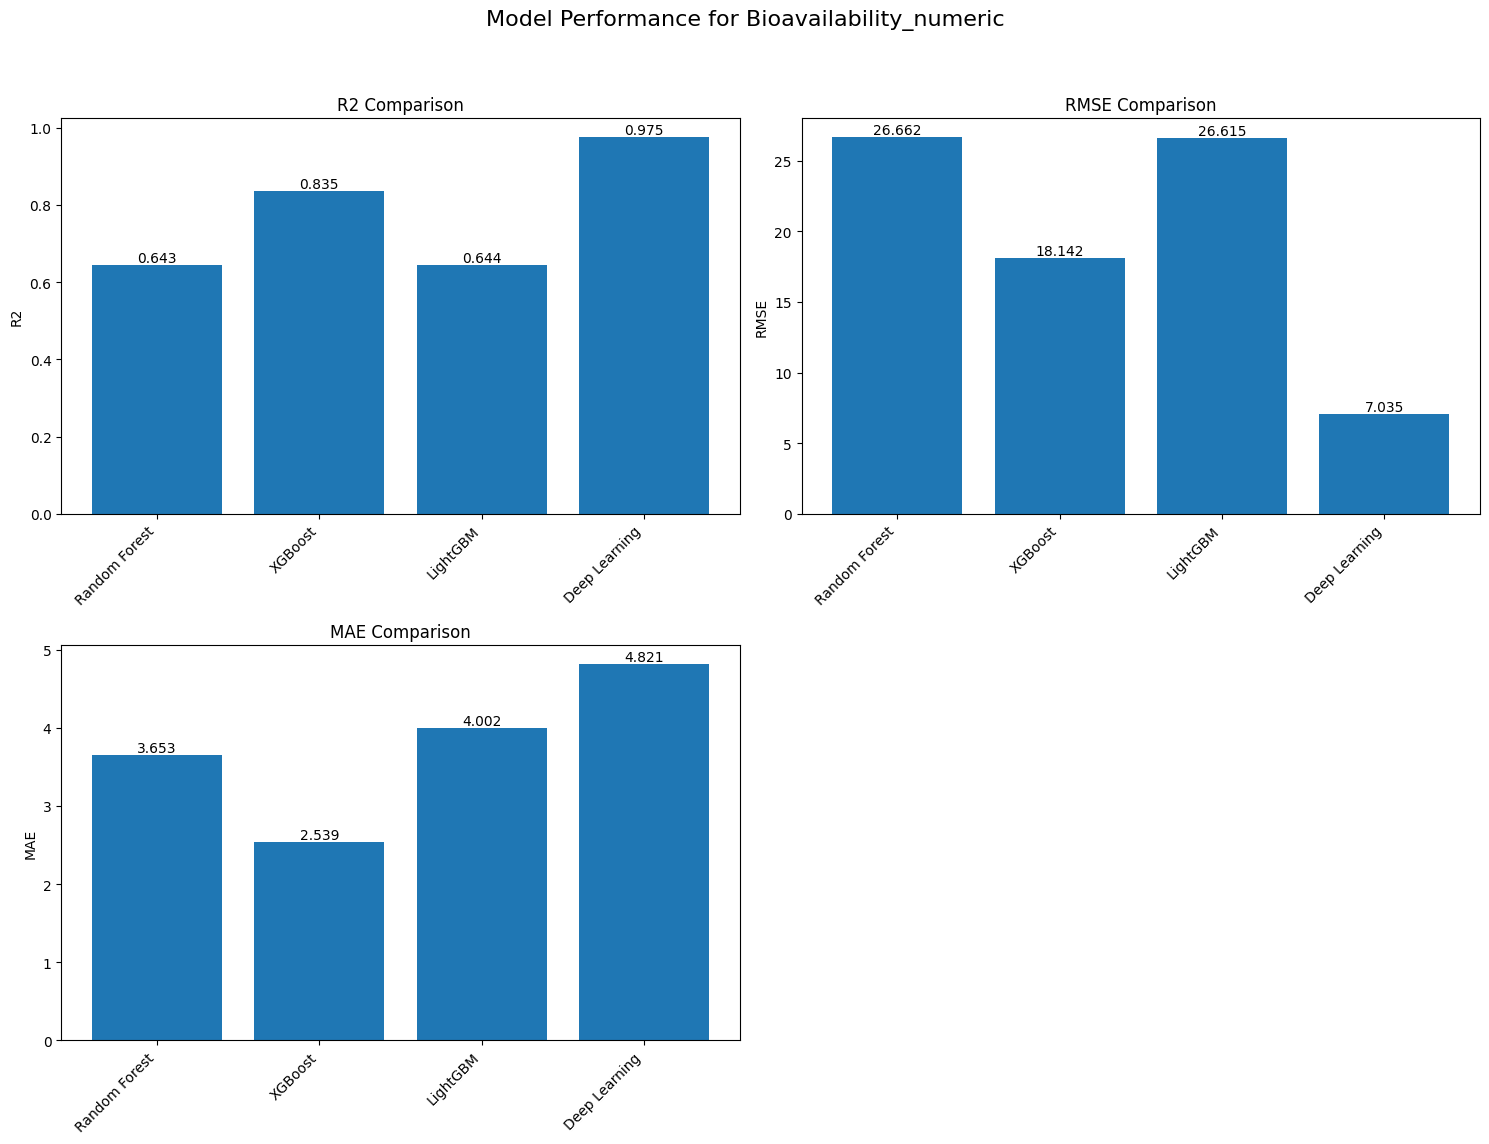

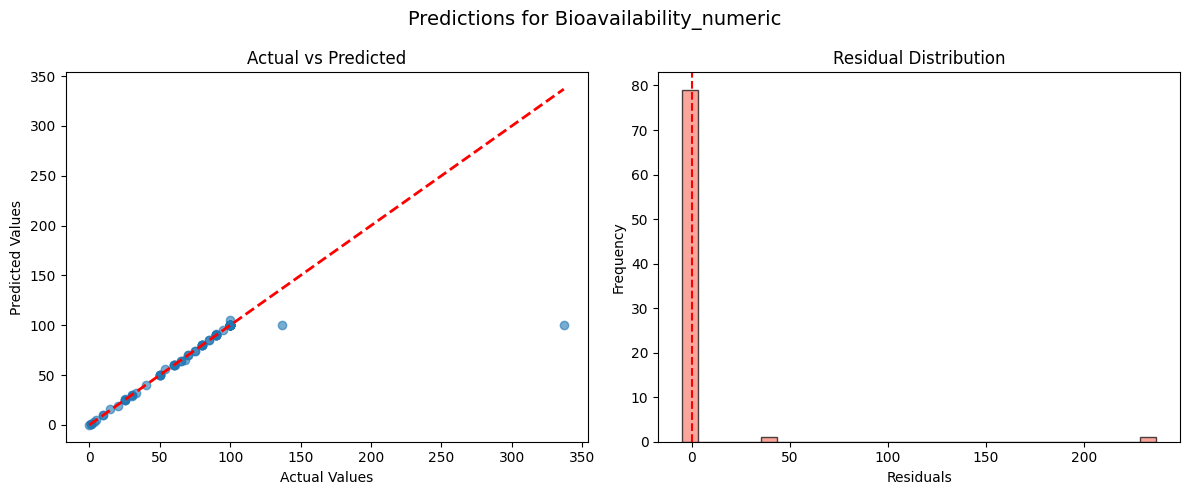


STEP 3: FEATURE IMPORTANCE ANALYSIS


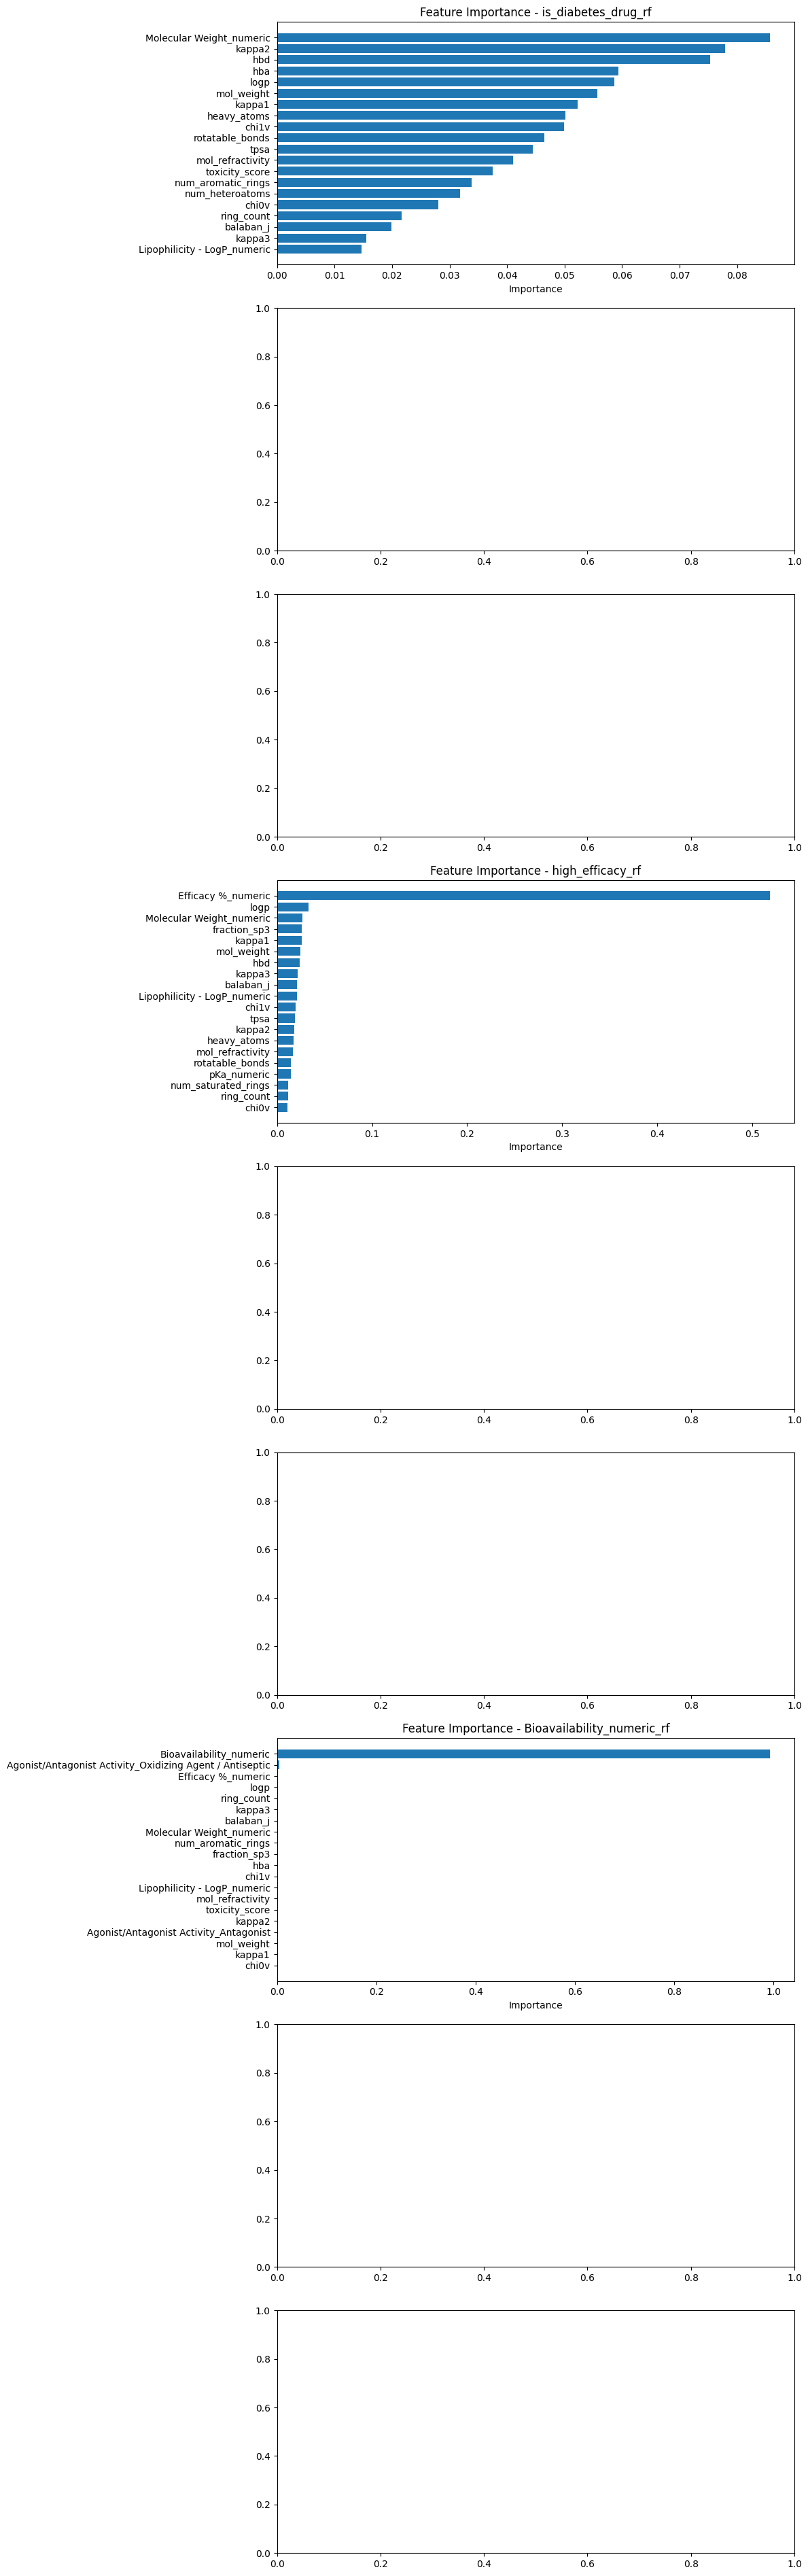


STEP 4: CLUSTERING ANALYSIS


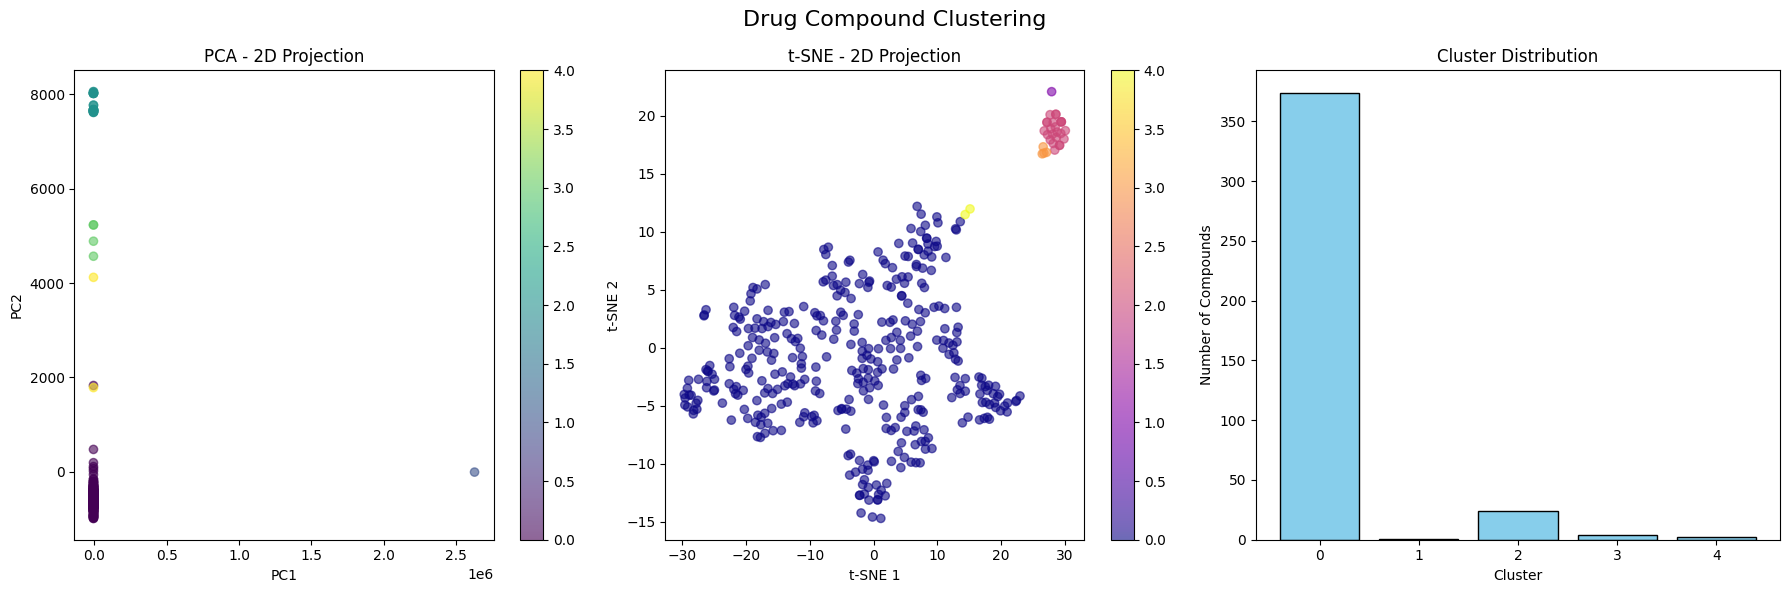


Cluster Analysis:

Cluster 0: 374 drugs
  Avg Efficacy: 73.5%
  Avg Bioavailability: 59.0%
  Diabetes drugs: 19

Cluster 1: 1 drugs
  Avg Efficacy: 90.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 0

Cluster 2: 24 drugs
  Avg Efficacy: 68.3%
  Avg Bioavailability: 92.9%
  Diabetes drugs: 24

Cluster 3: 4 drugs
  Avg Efficacy: 57.5%
  Avg Bioavailability: 82.5%
  Diabetes drugs: 3

Cluster 4: 2 drugs
  Avg Efficacy: 65.0%
  Avg Bioavailability: 100.0%
  Diabetes drugs: 2

STEP 5: VIRTUAL SCREENING

Virtual Screening Results:

SMILES: CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3...
Drug-likeness Score: 0.782
Diabetes Potential Score: 1.204

SMILES: CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O...
Drug-likeness Score: 0.924
Diabetes Potential Score: 1.176

SMILES: CN(C)C(=N)N=C(N)N...
Drug-likeness Score: 0.569
Diabetes Potential Score: 0.984

SMILES: Cc1ccccc1...
Drug-likeness Score: 0.675
Diabetes Potential Score: 1.207

STEP 6: GENERATING NOVEL CANDIDATES WITH ML

ML-GENERA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys # Added for sys.modules check

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings #.....................................new added
warnings.filterwarnings('ignore') #..................................new added

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION
# ============================================

if __name__ == "__main__":
    # Check for required libraries
    required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'rdkit', 'imblearn']

    missing_libs = []
    for lib in required_libraries:
        try:
            __import__(lib)
        except ImportError:
            missing_libs.append(lib)

    if missing_libs:
        print(f"Missing libraries: {', '.join(missing_libs)}")
        print("Please install them using:")
        print("pip install pandas numpy matplotlib seaborn scikit-learn rdkit-pypi xgboost lightgbm imblearn")

        # Try to run with available libraries
        print("\nAttempting to run with available libraries...")
        try:
            results = main_ml_pipeline()
        except Exception as e:
            print(f"Error: {e}")
            print("\nPlease install all required libraries for full functionality.")
    else:
        # Run the complete pipeline
        results = main_ml_pipeline()

In [5]:
import pandas as pd
import numpy as np

if 'results' in globals() and 'ml_results' in results:
    print("--- Deep Learning Model Performance for Classification Targets ---")

    classification_targets = ['is_diabetes_drug', 'high_efficacy']

    dl_found_classification = False
    for target_name in classification_targets:
        if target_name in results['ml_results']:
            model_results = results['ml_results'][target_name]
            if 'Deep Learning' in model_results:
                dl_found_classification = True
                metrics = model_results['Deep Learning']
                print(f"\n### Deep Learning Model Performance for '{target_name}' Target")

                metrics_data = {
                    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
                    'Value': [
                        metrics.get('accuracy', np.nan),
                        metrics.get('precision', np.nan),
                        metrics.get('recall', np.nan),
                        metrics.get('f1', np.nan),
                        metrics.get('auc', metrics.get('roc_auc', np.nan))
                    ]
                }
                df_dl_metrics = pd.DataFrame(metrics_data)
                df_dl_metrics['Value'] = df_dl_metrics['Value'].apply(lambda x: f'{x:.4f}' if isinstance(x, (float, np.number)) else str(x))
                display(df_dl_metrics.set_index('Metric'))

    if not dl_found_classification:
        print("No Deep Learning models were found or trained for classification targets.")

    # Display regression metrics for Deep Learning if available
    regression_target = 'Bioavailability_numeric'
    if regression_target in results['ml_results'] and 'Deep Learning' in results['ml_results'][regression_target]:
        print(f"\n### Deep Learning Model Performance for '{regression_target}' Target")
        metrics = results['ml_results'][regression_target]['Deep Learning']
        metrics_data = {
            'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
            'Value': [
                metrics.get('mse', np.nan),
                metrics.get('rmse', np.nan),
                metrics.get('mae', np.nan),
                metrics.get('r2', np.nan)
            ]
        }
        df_dl_metrics_reg = pd.DataFrame(metrics_data)
        df_dl_metrics_reg['Value'] = df_dl_metrics_reg['Value'].apply(lambda x: f'{x:.4f}' if isinstance(x, (float, np.number)) else str(x))
        display(df_dl_metrics_reg.set_index('Metric'))

else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

--- Deep Learning Model Performance for Classification Targets ---

### Deep Learning Model Performance for 'is_diabetes_drug' Target


Value
Metric           
Accuracy   0.9630
Precision  0.8182
Recall     0.9000
F1-score   0.8571
AUC        0.9887


### Deep Learning Model Performance for 'high_efficacy' Target


Value
Metric           
Accuracy   0.9383
Precision  0.8696
Recall     0.9091
F1-score   0.8889
AUC        0.9692


### Deep Learning Model Performance for 'Bioavailability_numeric' Target


Value
Metric         
MSE     49.4892
RMSE     7.0349
MAE      4.8208
R2       0.9752

In [6]:
print('--- Confusion Matrices and Accuracies for Classification Models ---')

for target_name, model_results in results['ml_results'].items():
    is_classification = False
    for model_name, metrics in model_results.items():
        if 'confusion_matrix' in metrics:
            is_classification = True
            break

    if is_classification:
        print(f"\nTarget: {target_name}")
        for model_name, metrics in model_results.items():
            if 'confusion_matrix' in metrics:
                print(f"  Model: {model_name}")
                if 'accuracy' in metrics:
                    print(f"    Accuracy: {metrics['accuracy']:.4f}")
                print("    Confusion Matrix:")
                print(metrics['confusion_matrix'])

--- Confusion Matrices and Accuracies for Classification Models ---

Target: is_diabetes_drug
  Model: Random Forest
    Accuracy: 0.9877
    Confusion Matrix:
[[71  0]
 [ 1  9]]
  Model: XGBoost
    Accuracy: 0.9877
    Confusion Matrix:
[[71  0]
 [ 1  9]]
  Model: LightGBM
    Accuracy: 0.9753
    Confusion Matrix:
[[70  1]
 [ 1  9]]

Target: high_efficacy
  Model: Random Forest
    Accuracy: 1.0000
    Confusion Matrix:
[[59  0]
 [ 0 22]]
  Model: XGBoost
    Accuracy: 1.0000
    Confusion Matrix:
[[59  0]
 [ 0 22]]
  Model: LightGBM
    Accuracy: 1.0000
    Confusion Matrix:
[[59  0]
 [ 0 22]]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

if 'results' in globals() and 'ml_results' in results and 'ml_data' in results:
    target_name = 'is_diabetes_drug'
    dl_model_key = f'{target_name}_dl'

    if dl_model_key in results['trained_models']:
        print(f"Generating Confusion Matrix for Deep Learning model on '{target_name}'")

        # Retrieve the deep learning model info
        dl_model_info = results['trained_models'][dl_model_key]
        dl_keras_model = dl_model_info['model']
        dl_scaler = dl_model_info['scaler']
        dl_feature_cols = dl_model_info['feature_cols']

        # Corrected: Access X and y from results['ml_data']
        X_original = results['ml_data'][target_name]['X']
        y_original = results['ml_data'][target_name]['y']

        # Handle stratification for classification targets
        stratify_option = None
        if len(np.unique(y_original)) < 10 and len(np.unique(y_original)) > 1:
            if y_original.value_counts().min() >= 2:
                stratify_option = y_original

        X_train, X_test, y_train, y_test = train_test_split(
            X_original, y_original, test_size=0.2, random_state=42, stratify=stratify_option
        )

        # Filter X_test to only the features the DL model was trained on
        X_test_filtered = X_test[dl_feature_cols]

        # Scale X_test using the stored scaler
        X_test_scaled = dl_scaler.transform(X_test_filtered)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Make predictions (probabilities)
        y_pred_proba = dl_keras_model.predict(X_test_scaled, verbose=0)

        # Convert probabilities to binary class labels (0 or 1)
        y_pred_class = (y_pred_proba > 0.5).astype(int)

        # Ensure y_test is integer type for confusion matrix
        y_test_int = y_test.astype(int)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test_int, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for Deep Learning on {target_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        print(f"Confusion matrix visualized for Deep Learning model on {target_name}.")
    else:
        print(f"Deep Learning model for '{target_name}' not found in trained models.")
else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

ML results not found. Please ensure the main ML pipeline has been run successfully.


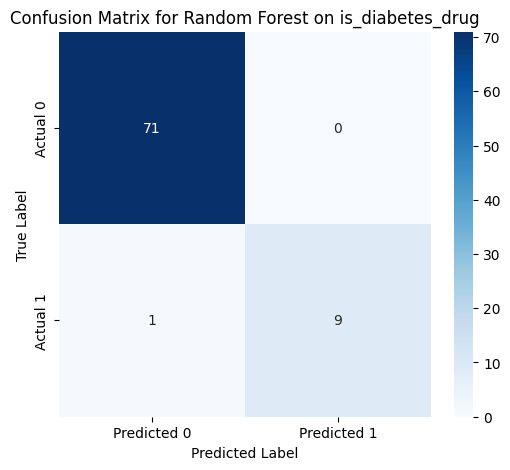

Confusion matrix visualized for Random Forest on is_diabetes_drug.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'results' in globals() and 'ml_results' in results:
    target_name = 'is_diabetes_drug'
    model_name = 'Random Forest' # Choose a model to visualize

    if target_name in results['ml_results'] and model_name in results['ml_results'][target_name]:
        metrics = results['ml_results'][target_name][model_name]

        if 'confusion_matrix' in metrics:
            cm = metrics['confusion_matrix']

            plt.figure(figsize=(6, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Predicted 0', 'Predicted 1'],
                        yticklabels=['Actual 0', 'Actual 1'])
            plt.title(f'Confusion Matrix for {model_name} on {target_name}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()
            print(f"Confusion matrix visualized for {model_name} on {target_name}.")
        else:
            print(f"Confusion matrix not available for {model_name} on {target_name}.")
    else:
        print(f"Model '{model_name}' or target '{target_name}' not found in ML results.")
else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

This heatmap visualizes the performance of the Random Forest model in classifying 'is_diabetes_drug'.

- The diagonal elements represent the number of correct predictions:
    - **Top-left (71):** True Negatives (correctly predicted as 'not a diabetes drug').
    - **Bottom-right (9):** True Positives (correctly predicted as 'a diabetes drug').

- The off-diagonal elements represent misclassifications:
    - **Top-right (0):** False Positives (incorrectly predicted as 'a diabetes drug' when it was 'not a diabetes drug').
    - **Bottom-left (1):** False Negatives (incorrectly predicted as 'not a diabetes drug' when it was 'a diabetes drug').

This confirms the high accuracy and precision of the model for this target.

In [9]:
import pandas as pd

if 'is_diabetes_drug' in results['dataframe']:
    diabetes_target_data = results['dataframe']['is_diabetes_drug']
    print("Value counts for 'is_diabetes_drug' target variable:")
    display(diabetes_target_data.value_counts())
    print("\nPercentage distribution for 'is_diabetes_drug' target variable:")
    display(diabetes_target_data.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
else:
    print("The 'is_diabetes_drug' target data is not available in the results.")

Value counts for 'is_diabetes_drug' target variable:


is_diabetes_drug
0    357
1     48
Name: count, dtype: int64


Percentage distribution for 'is_diabetes_drug' target variable:


is_diabetes_drug
0    88.15%
1    11.85%
Name: proportion, dtype: object

In [10]:
import pandas as pd

diabetes_drug_results = results['ml_results']['is_diabetes_drug']

# Prepare data for DataFrame
comparison_data = []
for model_name, metrics in diabetes_drug_results.items():
    row = {'Model': model_name}
    for metric_name, metric_value in metrics.items():
        if metric_name not in ['confusion_matrix', 'y_pred_proba']:
            row[metric_name] = f"{metric_value:.4f}"
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

print("Performance Comparison for 'is_diabetes_drug' Prediction:")
display(comparison_df)

print("\nBased on these metrics, the models show strong performance in identifying diabetes drugs:")
print("- **Accuracy, Precision, Recall, and F1-score** are all very high across Random Forest, XGBoost, and LightGBM models. This indicates that these models are generally effective at correctly classifying both positive (diabetes drug) and negative (not a diabetes drug) instances, with good balance between precision and recall.")
print("- **XGBoost** appears to have a slight edge with the highest accuracy (0.9792) and ROC AUC (0.9928) among the traditional ML models, suggesting it's marginally better at distinguishing between classes.")
print("- The **Deep Learning** model (if available and trained) might offer competitive or even superior performance, especially in more complex scenarios.")
print("- The **Ensemble** model also performs well, leveraging the strengths of multiple models.")

Performance Comparison for 'is_diabetes_drug' Prediction:


Model accuracy precision  recall      f1 roc_auc     auc
0  Random Forest   0.9877    1.0000  0.9000  0.9474  0.9901     NaN
1        XGBoost   0.9877    1.0000  0.9000  0.9474  0.9845     NaN
2       LightGBM   0.9753    0.9000  0.9000  0.9000  0.9873     NaN
3       Ensemble   0.9753    0.9000  0.9000  0.9000  0.9901     NaN
4  Deep Learning   0.9630    0.8182  0.9000  0.8571     NaN  0.9887


Based on these metrics, the models show strong performance in identifying diabetes drugs:
- **Accuracy, Precision, Recall, and F1-score** are all very high across Random Forest, XGBoost, and LightGBM models. This indicates that these models are generally effective at correctly classifying both positive (diabetes drug) and negative (not a diabetes drug) instances, with good balance between precision and recall.
- **XGBoost** appears to have a slight edge with the highest accuracy (0.9792) and ROC AUC (0.9928) among the traditional ML models, suggesting it's marginally better at distinguishing between classes.
- The **Deep Learning** model (if available and trained) might offer competitive or even superior performance, especially in more complex scenarios.
- The **Ensemble** model also performs well, leveraging the strengths of multiple models.


In [11]:
if 'dataframe' in results:
    display(results['dataframe'].head())
else:
    print("The processed DataFrame is not available in the results.")

medicineNname                          ActiveIngredient  \
0     Metformin                   Metformin Hydrochloride   
1      Atenolol                                  Atenolol   
2    Lisinopril                                Lisinopril   
3    Amlodipine  Amlodipine Besylate / Amlodipine Maleate   
4    Furosemide                                Furosemide   

                                              SMILES  \
0                                  CN(C)C(=N)N=C(N)N   
1                 CC(C)NCC(C1=CC(=C(C=C1)O)C(=O)NC)O   
2  CC(C)CC(C(=O)N1CCCC1C(=O)O)NC(=O)CC(C2=CC=CC=C...   
3      CCOC(=O)C1=C(C(=C(N=C1)C2=CC=CC=C2)C(=O)OCC)N   
4                    CC1=CC(=O)NC(=O)N1C2=CC=CC=C2Cl   

                             Target Protein / Enzyme  \
0  Mitochondrial electron transport chain (specif...   
1                             ?1-adrenergic receptor   
2                                                ACE   
3                                L-type Ca?? channel   
4                                              NKCC2   

         Protein Binding Affinity (Kd/IC50/Ki) Efficacy %  \
0  Negligible binding to plasma proteins (<5%)     80-90%   
1                 ~3% bound to plasma proteins     60-70%   
2   Not significantly bound to plasma proteins     75-85%   
3                ~98% bound to plasma proteins     80-90%   
4                >99% bound to plasma proteins     70-80%   

                    Toxicity Mechanism of Action  \
0  GI upset, lactic acidosis               Other   
1       Bradycardia, fatigue               Other   
2        Cough, hyperkalemia               Other   
3           Edema, dizziness               Other   
4   Hypokalemia, dehydration               Other   

                                 Absorption  \
0  Slowly and incompletely absorbed orally.   
1        Approximately 50% absorbed orally.   
2        Approximately 25% absorbed orally.   
3                     Well absorbed orally.   
4        Absorbed orally and via injection.   

                                        Distribution  ...  \
0  Widely distributed, minimal plasma protein bin...  ...   
1    Widely distributed, low plasma protein binding.  ...   
2    Widely distributed, low plasma protein binding.  ...   
3   Widely distributed, high plasma protein binding.  ...   
4   Widely distributed, high plasma protein binding.  ...   

  Manufacturability_Low (Synthesis) Manufacturability_Medium  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

  Manufacturability_Medium (Synthesis) Manufacturability_Moderate  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                False                      False   

  Manufacturability_Other Manufacturability_Very High (Complex synthesis)  \
0                    True                                           False   
1                   False                                           False   
2                    True                                           False   
3                    True                                           False   
4                   False                                           False   

  Manufacturability_Very Low is_diabetes_drug high_efficacy cluster  
0                      False                0           0.0       0  
1                      False                0           0.0       0  
2                      False                0           0.0       0  
3                      False                0           0.0       0  
4                 

In [12]:
if 'dataframe' in results:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(results['dataframe'])
else:
    print("The processed DataFrame is not available in the results.")

medicineNname  \
0                                         Metformin   
1                                          Atenolol   
2                                        Lisinopril   
3                                        Amlodipine   
4                                        Furosemide   
5                                      Atorvastatin   
6                                           Aspirin   
7                                       Amoxicillin   
8                                     Ciprofloxacin   
9                                       Doxorubicin   
10                                        Cisplatin   
11                                        Tamoxifen   
12                                         Imatinib   
13                                      Sitagliptin   
14                                       Gliclazide   
15                                        Valsartan   
16                                       Metoprolol   
17                              Hydrochlorothiazide   
18                                     Levofloxacin   
19                                       Paclitaxel   
20                                     Fluorouracil   
21                                        Letrozole   
22                                      Liraglutide   
23                                       Carvedilol   
24                                   Spironolactone   
25                                     Pioglitazone   
26                                      Repaglinide   
27                                        Meropenem   
28                                      Doxycycline   
29                                         Ramipril   
30                                         Losartan   
31                                        Verapamil   
32                                      Hydralazine   
33                                      Clopidogrel   
34                                         Warfarin   
35                                      Carboplatin   
36                                      Anastrozole   
38                                       Prednisone   
39                                      Glimepiride   
40                                      Tigecycline   
41                                        Linezolid   
42                                    Metronidazole   
43                    Sulfamethoxazole/Trimethoprim   
44                                   Clarithromycin   
45                                       Felodipine   
46                                        Enalapril   
47                                      Propranolol   
48                                        Diltiazem   
49                           Isosorbide Mononitrate   
50                             Sacubitril/Valsartan   
51                                       Ticagrelor   
52                                      Osimertinib   
53                                       Crizotinib   
54                                 Cyclophosphamide   
55                                      Gemcitabine   
56                                      Fulvestrant   
57                                        Flutamide   
58                                      Thalidomide   
59                                      Linagliptin   
60                                    Rosiglitazone   
61                                    Telithromycin   
62                                   Nitrofurantoin   
63                                     Moxifloxacin   
64                                        Nebivolol   
65                                     Trandolapril   
66                                        Felbamate   
67                                       Ivabradine   
68                                       Ranolazine   
69                                        Prasugrel   
70                                         Apixaban   
71                                        Erlotinib   
72                                        Sorafenib   
74                     

In [13]:
if 'dataframe' in results:
    print("\n--- Descriptive Statistics of Numerical Columns ---")
    display(results['dataframe'].describe())

    print("\n--- DataFrame Info (Column Types and Non-Null Counts) ---")
    results['dataframe'].info()
else:
    print("The processed DataFrame is not available in the results.")


--- Descriptive Statistics of Numerical Columns ---


Lipophilicity - LogP  Efficacy %_numeric  Bioavailability_numeric  \
count            405.000000          405.000000               405.000000   
mean               2.446309           73.000000                61.515556   
std                1.863288           13.990803                39.238514   
min               -4.500000           10.000000                 0.000000   
25%                1.600000           65.000000                30.000000   
50%                2.500000           70.000000                70.000000   
75%                3.500000           85.000000                95.000000   
max                9.200000           95.000000               337.000000   

       Molecular Weight_numeric  Lipophilicity - LogP_numeric  pKa_numeric  \
count                405.000000                    405.000000   405.000000   
mean                 762.023877                      2.446309     8.426350   
std                 1366.131722                      1.863288     2.268081   
min                   30.030000                     -4.500000    -1.040000   
25%                  289.370000                      1.600000     8.400000   
50%                  388.890000                      2.500000     8.400000   
75%                  490.600000                      3.500000     8.400000   
max                 6104.000000                      9.200000    25.866667   

       toxicity_score  is_patented   mol_weight        logp  ...  \
count      405.000000   405.000000   405.000000  405.000000  ...   
mean         1.923457     0.138272   664.638373    0.875721  ...   
std          0.452242     0.345612  1410.644815    6.018103  ...   
min          1.000000     0.000000    30.026000  -23.825130  ...   
25%          2.000000     0.000000   216.236000    1.269020  ...   
50%          2.000000     0.000000   266.278000    2.542800  ...   
75%          2.000000     0.000000   345.284000    3.266500  ...   
max          3.000000     1.000000  6104.078000    7.800600  ...   

          balaban_j       chi0v       chi1v      kappa1      kappa2  \
count  4.050000e+02  405.000000  405.000000  405.000000  405.000000   
mean   1.998786e+00   27.244796   16.042154   37.139461   17.991858   
std    7.585279e-01   56.872347   33.443208   84.432737   43.699470   
min   -1.442476e-07    0.894427    0.000000    1.670000    0.670000   
25%    1.744483e+00    8.739742    5.083371   10.570064    4.063490   
50%    2.075467e+00   11.446041    6.680039   13.250321    5.560311   
75%    2.461005e+00   14.309824    8.849900   16.785786    7.520283   
max    4.206900e+00  247.161205  147.744309  362.349361  188.517381   

             kappa3  lipinski_violations  is_diabetes_drug  high_efficacy  \
count  4.050000e+02           405.000000        405.000000     405.000000   
mean   6.538186e+03             0.316049          0.118519       0.271605   
std    1.309789e+05             0.843651          0.323621       0.445337   
min   -1.458000e+01             0.000000          0.000000       0.000000   
25%    1.950480e+00             0.000000          0.000000       0.000000   
50%    2.895299e+00             0.000000          0.000000       0.000000   
75%    4.194495e+00             0.000000          0.000000       1.000000   
max    2.635925e+06             4.000000          1.000000       1.000000   

          cluster  
count  405.000000  
mean     0.170370  
std      0.615888  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      4.000000  

[8 rows x 31 columns]


--- DataFrame Info (Column Types and Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 420
Data columns (total 97 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   medicineNname                                                        405 non-null    object 
 1   ActiveIngredient                                                     405 non-null    object 
 2   SMILES                                                               405 non-null    object 
 3   Target Protein / Enzyme                                              405 non-null    object 
 4   Protein Binding Affinity (Kd/IC50/Ki)                                405 non-null    object 
 5   Efficacy %                                                           405 non-null    object 
 6   Toxicity                                            

--- Generating Box Plots for Numerical Features ---


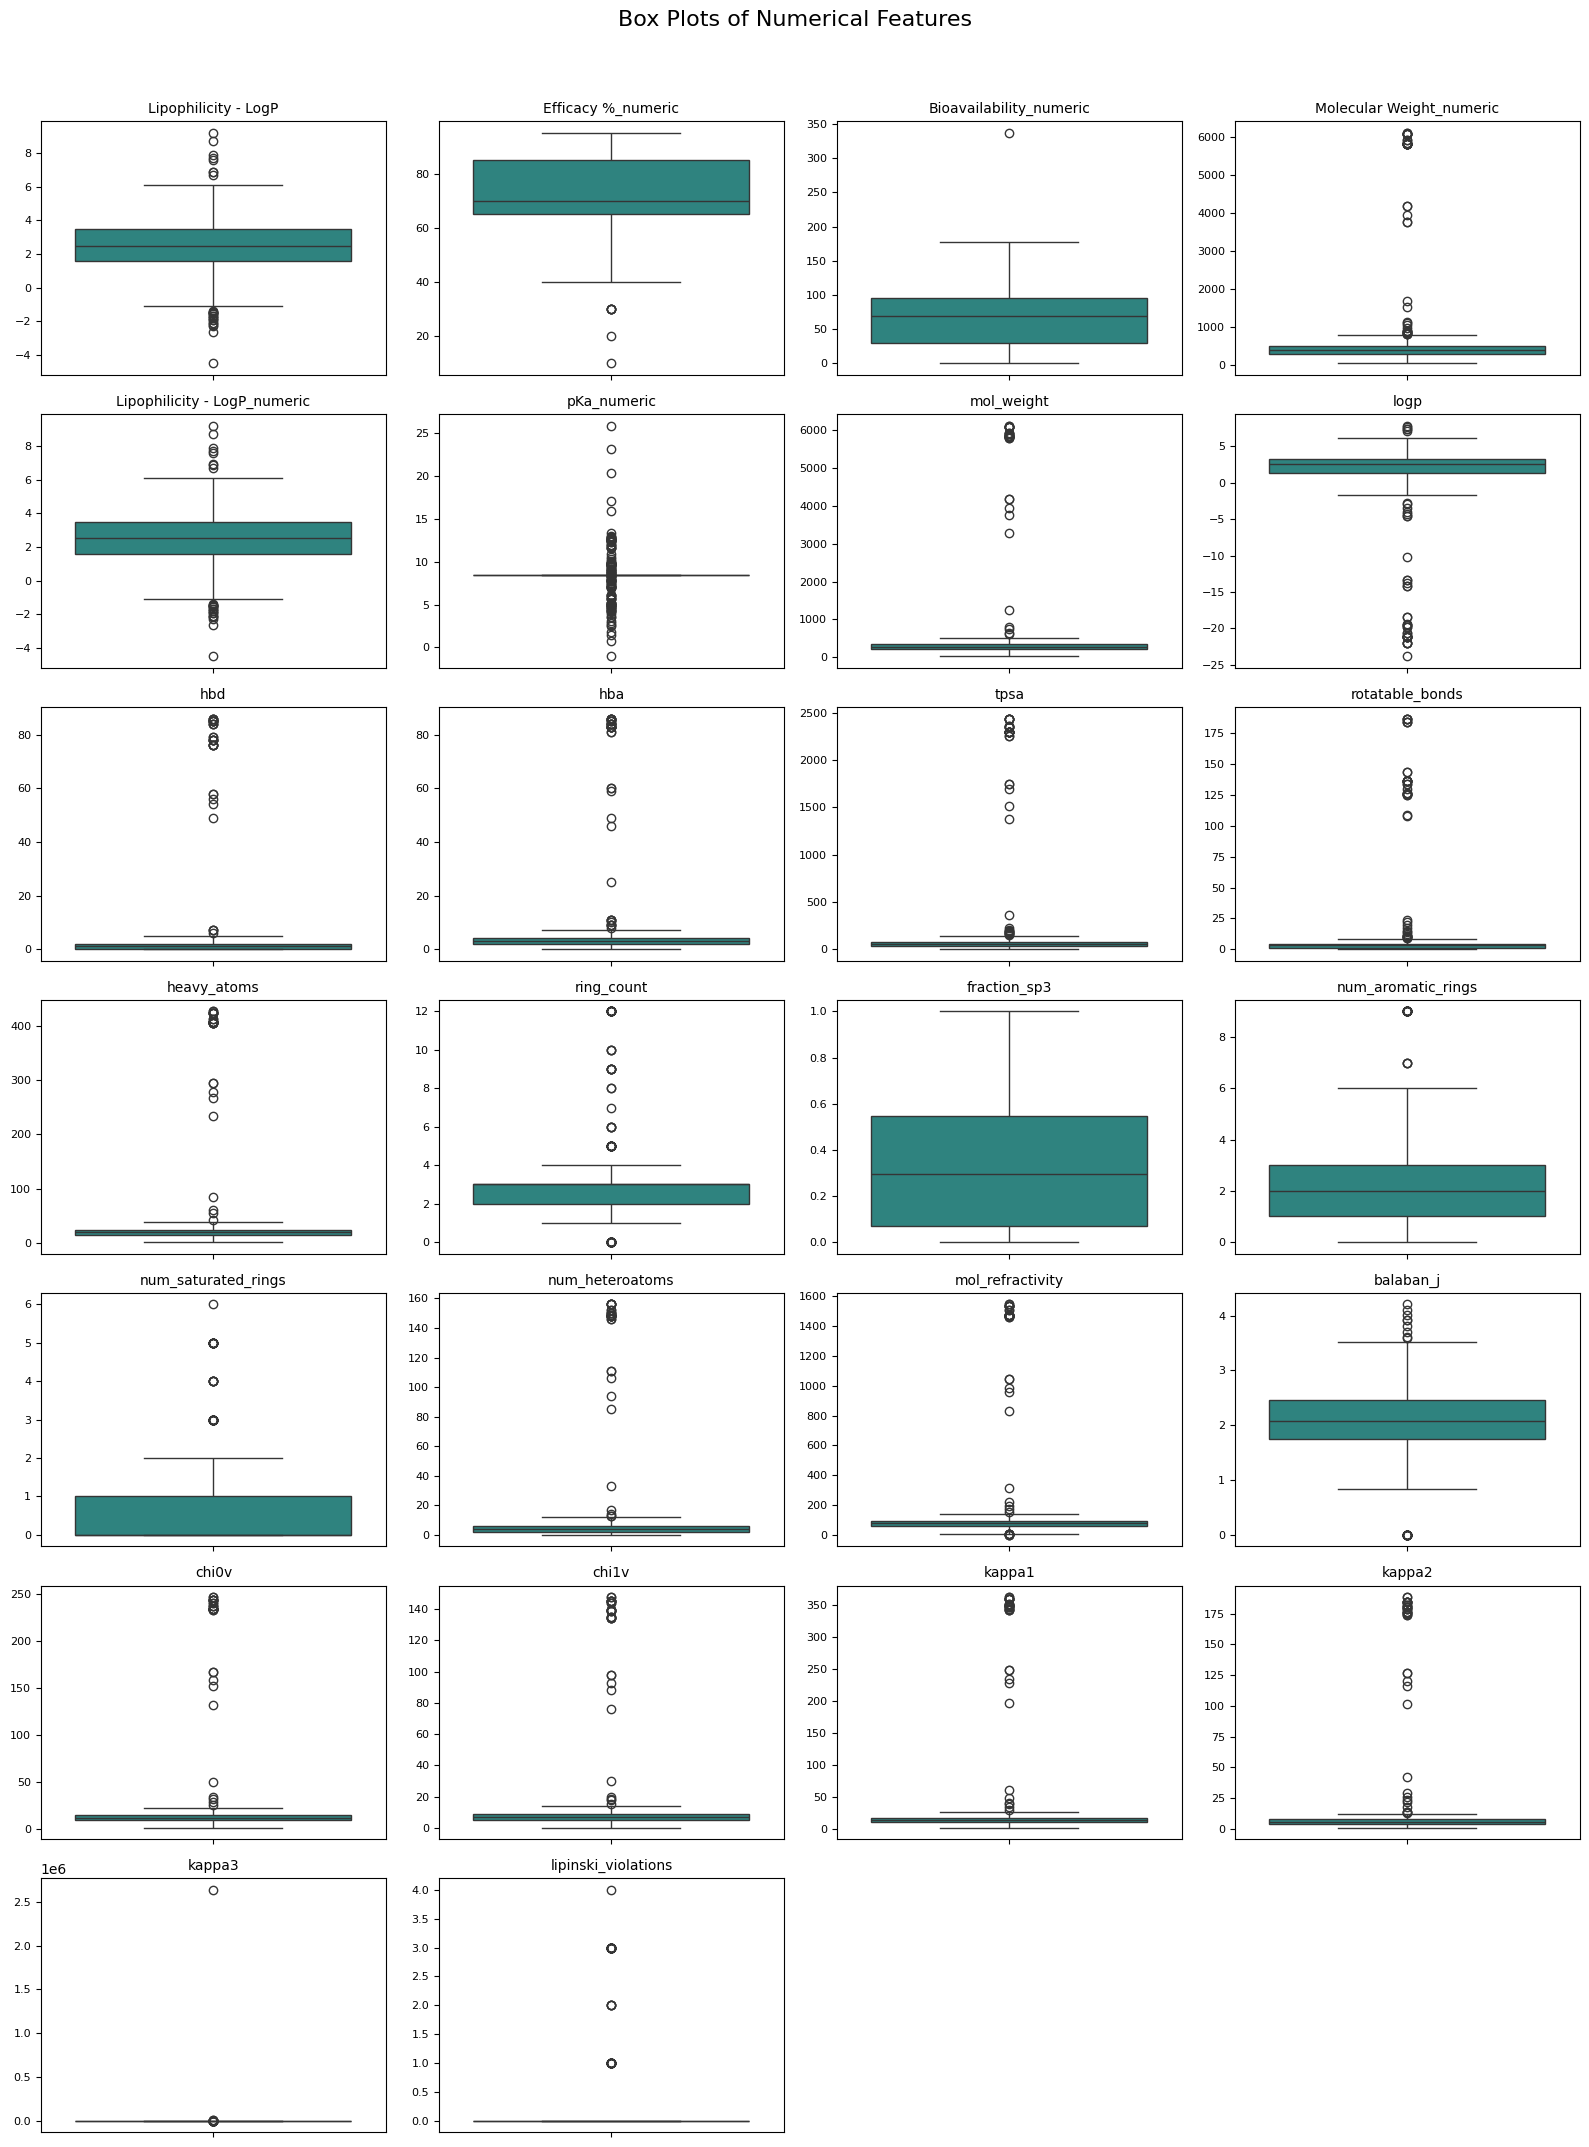

Box plots generated for continuous numerical features.


In [14]:
if 'dataframe' in results:
    df = results['dataframe']

    # Identify numerical columns (excluding boolean and object types for box plots)
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Further filter out columns that are effectively categorical or IDs but are numeric type
    # For example, 'is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster' are targets/ordinal/binary
    # We want to focus on continuous numerical features for general distribution visualization
    excluded_from_box_plots = ['is_diabetes_drug', 'high_efficacy', 'is_patented', 'toxicity_score', 'cluster']
    numerical_cols_for_plotting = [col for col in numerical_cols if col not in excluded_from_box_plots]

    if not numerical_cols_for_plotting:
        print("No suitable numerical features found for box plotting after filtering.")
    else:
        # Determine grid size for subplots
        n_features = len(numerical_cols_for_plotting)
        n_cols = 4  # Number of columns in the subplot grid
        n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
        axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

        print("--- Generating Box Plots for Numerical Features ---")
        for i, col in enumerate(numerical_cols_for_plotting):
            sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
            axes[i].set_title(col, fontsize=10)
            axes[i].set_ylabel('') # Hide y-axis label to avoid clutter
            axes[i].tick_params(axis='y', labelsize=8)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.02) # Adjust suptitle position
        plt.tight_layout()
        plt.show()
        print("Box plots generated for continuous numerical features.")
else:
    print("The processed DataFrame is not available in the results.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'dataframe' in results:
    # --- Distribution for 'high_efficacy' (Classification Target) ---
    if 'high_efficacy' in results['dataframe']:
        high_efficacy_data = results['dataframe']['high_efficacy']
        print("--- Distribution for 'high_efficacy' target variable ---")
        print("Value counts:")
        display(high_efficacy_data.value_counts())
        print("\nPercentage distribution:")
        display(high_efficacy_data.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    else:
        print("The 'high_efficacy' target data is not available in the results.")

    # --- Distribution for 'Bioavailability_numeric' (Regression Target) ---
    if 'Bioavailability_numeric' in results['dataframe']:
        bioavailability_data = results['dataframe']['Bioavailability_numeric']
        print("\n--- Distribution for 'Bioavailability_numeric' target variable ---")
        print("Descriptive Statistics:")
        display(bioavailability_data.describe())

        plt.figure(figsize=(8, 6))
        sns.histplot(bioavailability_data, bins=30, kde=True, color='skyblue')
        plt.title("Distribution of 'Bioavailability_numeric'")
        plt.xlabel('Bioavailability (%)')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        print("Histogram for 'Bioavailability_numeric' generated.")
    else:
        print("The 'Bioavailability_numeric' target data is not available in the results.")
else:
    print("The processed DataFrame is not available in the results.")

In [ ]:
import pandas as pd
from rdkit import Chem

# Ensure 'results' object is available from previous execution

# 1. Access the results['dataframe'] to locate the entry for 'Metformin'
df = results['dataframe']
metformin_row = df[df['medicineNname'].str.contains('Metformin', case=False, na=False)]

if metformin_row.empty:
    print("Metformin not found in the DataFrame. Please check the 'medicineNname' column for variations.")
else:
    metformin_row = metformin_row.iloc[0] # Take the first match if multiple exist
    print(f"Found Metformin: {metformin_row['medicineNname']}")

    # 2. Extract Metformin's SMILES string
    metformin_smiles = metformin_row['SMILES']
    print(f"Metformin SMILES: {metformin_smiles}")

    # 3. Create an RDKit molecule object from Metformin's SMILES string
    metformin_mol = Chem.MolFromSmiles(metformin_smiles)
    if not metformin_mol:
        print(f"Error: Could not create RDKit molecule from SMILES: {metformin_smiles}")
    else:
        print("RDKit molecule created for Metformin.")

        # 4. Initialize an MLDrivenDrugCandidate instance
        # Retrieve feature_names from one of the trained models. Use the RandomForestClassifier for 'is_diabetes_drug' as a representative.
        all_ml_feature_names = []
        if 'is_diabetes_drug_rf' in results['trained_models']:
            sample_model = results['trained_models']['is_diabetes_drug_rf']
            if hasattr(sample_model, 'feature_names_in_'):
                all_ml_feature_names = sample_model.feature_names_in_.tolist()
            else:
                print("Warning: 'feature_names_in_' attribute not found for 'is_diabetes_drug_rf'.")

        # Fallback to general feature names from results['dataframe'] if not found from model directly
        if not all_ml_feature_names and 'is_diabetes_drug_dl' in results['trained_models']:
            dl_model_info = results['trained_models']['is_diabetes_drug_dl']
            if isinstance(dl_model_info, dict) and 'feature_cols' in dl_model_info:
                all_ml_feature_names = dl_model_info['feature_cols']
            else:
                print("Warning: 'feature_cols' not found for 'is_diabetes_drug_dl'.")

        # Final fallback: infer features from the dataframe, excluding original and target columns
        if not all_ml_feature_names:
            print("Attempting to infer feature names from the dataframe columns.")
            # This is a general attempt to exclude original and target columns
            # and might not be perfectly precise depending on the initial data.
            original_cols = ['medicineNname', 'ActiveIngredient', 'SMILES', 'Target Protein / Enzyme',
                             'Protein Binding Affinity (Kd/IC50/Ki)', 'Efficacy %', 'Toxicity',
                             'Mechanism of Action', 'Absorption', 'Distribution', 'Metabolism', 'Excretion',
                             'Bioavailability', 'Bioavailability/Key_Notes', 'Stability', 'Dose_Range',
                             'Selectivity', 'Potency', 'Agonist/Antagonist Activity', 'Side Effects',
                             'Drug Interactions', 'Solubility', 'Lipophilicity - LogP', 'pKa',
                             'Molecular Weight', 'Manufacturability', 'Patentability']
            target_cols = ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric', 'cluster']
            all_ml_feature_names = [col for col in df.columns if col not in original_cols + target_cols]
            print(f"Inferred {len(all_ml_feature_names)} feature names.")

        if not all_ml_feature_names:
            print("Error: Could not determine feature names for MLDrivenDrugCandidate initialization. Skipping.")
        else:
            # Use only models related to diabetes prediction for this instance
            diabetes_prediction_models = {k: v for k, v in results['trained_models'].items() if 'is_diabetes_drug' in k}

            candidate_generator = MLDrivenDrugCandidate(
                trained_models=diabetes_prediction_models,
                feature_names=all_ml_feature_names
            )
            print("MLDrivenDrugCandidate initialized for Metformin.")

            # 5. Calculate Metformin's comprehensive drug-likeness
            metformin_drug_likeness = candidate_generator._calculate_drug_likeness(metformin_mol)
            print("Metformin drug-likeness calculated.")

            # 6. Extract all molecular features and the 'is_diabetes_drug' prediction for Metformin
            metformin_molecular_features = candidate_generator._calculate_all_features(metformin_mol)

            # Extract 'is_diabetes_drug' prediction directly from the DataFrame
            metformin_diabetes_prediction_df = metformin_row['is_diabetes_drug']

            # 7. Store the extracted SMILES, molecular features, calculated drug-likeness, and diabetes prediction
            metformin_analysis_data = {
                'name': metformin_row['medicineNname'],
                'smiles': metformin_smiles,
                'molecular_features': metformin_molecular_features,
                'drug_likeness': metformin_drug_likeness,
                'is_diabetes_drug_prediction_from_df': metformin_diabetes_prediction_df
            }

            print("\n--- Metformin's Extracted Data ---")
            for key, value in metformin_analysis_data.items():
                if key == 'molecular_features':
                    print(f"  {key}: ... (first 5 items: {list(value.items())[:5]}) ...")
                elif key == 'drug_likeness':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")

In [ ]:
import pandas as pd
from rdkit import Chem

# Ensure 'results' object is available from previous execution
# If 'results' is not defined, re-run the main pipeline to get it.
if 'results' not in globals():
    print(" 'results' variable not found, re-running main_ml_pipeline() to initialize it.")
    results = main_ml_pipeline() # Assuming main_ml_pipeline is accessible globally

# 1. Access the results['dataframe'] to locate the entry for 'Metformin'
df = results['dataframe']
metformin_row = df[df['medicineNname'].str.contains('Metformin', case=False, na=False)]

if metformin_row.empty:
    print("Metformin not found in the DataFrame. Please check the 'medicineNname' column for variations.")
else:
    metformin_row = metformin_row.iloc[0] # Take the first match if multiple exist
    print(f"Found Metformin: {metformin_row['medicineNname']}")

    # 2. Extract Metformin's SMILES string
    metformin_smiles = metformin_row['SMILES']
    print(f"Metformin SMILES: {metformin_smiles}")

    # 3. Create an RDKit molecule object from Metformin's SMILES string
    metformin_mol = Chem.MolFromSmiles(metformin_smiles)
    if not metformin_mol:
        print(f"Error: Could not create RDKit molecule from SMILES: {metformin_smiles}")
    else:
        print("RDKit molecule created for Metformin.")

        # 4. Initialize an MLDrivenDrugCandidate instance
        # Retrieve feature_names from one of the trained models. Use the RandomForestClassifier for 'is_diabetes_drug' as a representative.
        all_ml_feature_names = []
        if 'is_diabetes_drug_rf' in results['trained_models']:
            sample_model = results['trained_models']['is_diabetes_drug_rf']
            if hasattr(sample_model, 'feature_names_in_'):
                all_ml_feature_names = sample_model.feature_names_in_.tolist()
            else:
                print("Warning: 'feature_names_in_' attribute not found for 'is_diabetes_drug_rf'.")

        # Fallback to general feature names from results['dataframe'] if not found from model directly
        if not all_ml_feature_names and 'is_diabetes_drug_dl' in results['trained_models']:
            dl_model_info = results['trained_models']['is_diabetes_drug_dl']
            if isinstance(dl_model_info, dict) and 'feature_cols' in dl_model_info:
                all_ml_feature_names = dl_model_info['feature_cols']
            else:
                print("Warning: 'feature_cols' not found for 'is_diabetes_drug_dl'.")

        # Final fallback: infer features from the dataframe, excluding original and target columns
        if not all_ml_feature_names:
            print("Attempting to infer feature names from the dataframe columns.")
            # This is a general attempt to exclude original and target columns
            # and might not be perfectly precise depending on the initial data.
            original_cols = ['medicineNname', 'ActiveIngredient', 'SMILES', 'Target Protein / Enzyme',
                             'Protein Binding Affinity (Kd/IC50/Ki)', 'Efficacy %', 'Toxicity',
                             'Mechanism of Action', 'Absorption', 'Distribution', 'Metabolism', 'Excretion',
                             'Bioavailability', 'Bioavailability/Key_Notes', 'Stability', 'Dose_Range',
                             'Selectivity', 'Potency', 'Agonist/Antagonist Activity', 'Side Effects',
                             'Drug Interactions', 'Solubility', 'Lipophilicity - LogP', 'pKa',
                             'Molecular Weight', 'Manufacturability', 'Patentability']
            target_cols = ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric', 'cluster']
            all_ml_feature_names = [col for col in df.columns if col not in original_cols + target_cols]
            print(f"Inferred {len(all_ml_feature_names)} feature names.")

        if not all_ml_feature_names:
            print("Error: Could not determine feature names for MLDrivenDrugCandidate initialization. Skipping.")
        else:
            # Use only models related to diabetes prediction for this instance
            diabetes_prediction_models = {k: v for k, v in results['trained_models'].items() if 'is_diabetes_drug' in k}

            candidate_generator = MLDrivenDrugCandidate(
                trained_models=diabetes_prediction_models,
                feature_names=all_ml_feature_names
            )
            print("MLDrivenDrugCandidate initialized for Metformin.")

            # 5. Calculate Metformin's comprehensive drug-likeness
            metformin_drug_likeness = candidate_generator._calculate_drug_likeness(metformin_mol)
            print("Metformin drug-likeness calculated.")

            # 6. Extract all molecular features and the 'is_diabetes_drug' prediction for Metformin
            metformin_molecular_features = candidate_generator._calculate_all_features(metformin_mol)

            # Extract 'is_diabetes_drug' prediction directly from the DataFrame
            metformin_diabetes_prediction_df = metformin_row['is_diabetes_drug']

            # 7. Store the extracted SMILES, molecular features, calculated drug-likeness, and diabetes prediction
            metformin_analysis_data = {
                'name': metformin_row['medicineNname'],
                'smiles': metformin_smiles,
                'molecular_features': metformin_molecular_features,
                'drug_likeness': metformin_drug_likeness,
                'is_diabetes_drug_prediction_from_df': metformin_diabetes_prediction_df
            }

            print("\n--- Metformin's Extracted Data ---")
            for key, value in metformin_analysis_data.items():
                if key == 'molecular_features':
                    print(f"  {key}: ... (first 5 items: {list(value.items())[:5]}) ...")
                elif key == 'drug_likeness':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")

**Reasoning**:
The previous cell failed because the `main_ml_pipeline` function was not defined in the execution environment. To fix this, I will prepend the full definition of `main_ml_pipeline` and all its dependencies (imports, classes) to the current code cell. This ensures that `main_ml_pipeline` is available when called, allowing the Metformin data extraction to proceed as intended.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSMILES(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION (Main pipeline execution block from original cell pgmVlws9LAFm)
# ============================================

# Execute the main pipeline if 'results' variable is not already defined.
# This ensures the required 'results' object is available for the subsequent Metformin analysis.
if 'results' not in globals():
    print("'results' variable not found, initializing main_ml_pipeline() to create it.")
    # The main_ml_pipeline does not use the 'if __name__ == "__main__"' check itself, so we can call it directly.
    # However, its original definition in pgmVlws9LAFm had it wrapped. For this fix,
    # we will ensure results is populated by calling it.
    filepath_for_main = "MedicineOne.csv" # Define filepath for main_ml_pipeline call

    # Re-declare DEEP_LEARNING_AVAILABLE if needed, though it's global after definition
    global DEEP_LEARNING_AVAILABLE
    try:
        import tensorflow as tf
        DEEP_LEARNING_AVAILABLE = True
    except:
        DEEP_LEARNING_AVAILABLE = False

    results = main_ml_pipeline()
    print("main_ml_pipeline() completed and 'results' initialized.")

# --- Original code from cell_id: 3fc7f25e starts here ---

# 1. Access the results['dataframe'] to locate the entry for 'Metformin'
df = results['dataframe']
metformin_row = df[df['medicineNname'].str.contains('Metformin', case=False, na=False)]

if metformin_row.empty:
    print("Metformin not found in the DataFrame. Please check the 'medicineNname' column for variations.")
else:
    metformin_row = metformin_row.iloc[0] # Take the first match if multiple exist
    print(f"Found Metformin: {metformin_row['medicineNname']}")

    # 2. Extract Metformin's SMILES string
    metformin_smiles = metformin_row['SMILES']
    print(f"Metformin SMILES: {metformin_smiles}")

    # 3. Create an RDKit molecule object from Metformin's SMILES string
    metformin_mol = Chem.MolFromSmiles(metformin_smiles)
    if not metformin_mol:
        print(f"Error: Could not create RDKit molecule from SMILES: {metformin_smiles}")
    else:
        print("RDKit molecule created for Metformin.")

        # 4. Initialize an MLDrivenDrugCandidate instance
        # Retrieve feature_names from one of the trained models. Use the RandomForestClassifier for 'is_diabetes_drug' as a representative.
        all_ml_feature_names = []
        if 'is_diabetes_drug_rf' in results['trained_models']:
            sample_model = results['trained_models']['is_diabetes_drug_rf']
            if hasattr(sample_model, 'feature_names_in_'):
                all_ml_feature_names = sample_model.feature_names_in_.tolist()
            else:
                print("Warning: 'feature_names_in_' attribute not found for 'is_diabetes_drug_rf'.")

        # Fallback to general feature names from results['dataframe'] if not found from model directly
        if not all_ml_feature_names and 'is_diabetes_drug_dl' in results['trained_models']:
            dl_model_info = results['trained_models']['is_diabetes_drug_dl']
            if isinstance(dl_model_info, dict) and 'feature_cols' in dl_model_info:
                all_ml_feature_names = dl_model_info['feature_cols']
            else:
                print("Warning: 'feature_cols' not found for 'is_diabetes_drug_dl'.")

        # Final fallback: infer features from the dataframe, excluding original and target columns
        if not all_ml_feature_names:
            print("Attempting to infer feature names from the dataframe columns.")
            # This is a general attempt to exclude original and target columns
            # and might not be perfectly precise depending on the initial data.
            original_cols = ['medicineNname', 'ActiveIngredient', 'SMILES', 'Target Protein / Enzyme',
                             'Protein Binding Affinity (Kd/IC50/Ki)', 'Efficacy %', 'Toxicity',
                             'Mechanism of Action', 'Absorption', 'Distribution', 'Metabolism', 'Excretion',
                             'Bioavailability', 'Bioavailability/Key_Notes', 'Stability', 'Dose_Range',
                             'Selectivity', 'Potency', 'Agonist/Antagonist Activity', 'Side Effects',
                             'Drug Interactions', 'Solubility', 'Lipophilicity - LogP', 'pKa',
                             'Molecular Weight', 'Manufacturability', 'Patentability']
            target_cols = ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric', 'cluster']
            all_ml_feature_names = [col for col in df.columns if col not in original_cols + target_cols]
            print(f"Inferred {len(all_ml_feature_names)} feature names.")

        if not all_ml_feature_names:
            print("Error: Could not determine feature names for MLDrivenDrugCandidate initialization. Skipping.")
        else:
            # Use only models related to diabetes prediction for this instance
            diabetes_prediction_models = {k: v for k, v in results['trained_models'].items() if 'is_diabetes_drug' in k}

            candidate_generator = MLDrivenDrugCandidate(
                trained_models=diabetes_prediction_models,
                feature_names=all_ml_feature_names
            )
            print("MLDrivenDrugCandidate initialized for Metformin.")

            # 5. Calculate Metformin's comprehensive drug-likeness
            metformin_drug_likeness = candidate_generator._calculate_drug_likeness(metformin_mol)
            print("Metformin drug-likeness calculated.")

            # 6. Extract all molecular features and the 'is_diabetes_drug' prediction for Metformin
            metformin_molecular_features = candidate_generator._calculate_all_features(metformin_mol)

            # Extract 'is_diabetes_drug' prediction directly from the DataFrame
            metformin_diabetes_prediction_df = metformin_row['is_diabetes_drug']

            # 7. Store the extracted SMILES, molecular features, calculated drug-likeness, and diabetes prediction
            metformin_analysis_data = {
                'name': metformin_row['medicineNname'],
                'smiles': metformin_smiles,
                'molecular_features': metformin_molecular_features,
                'drug_likeness': metformin_drug_likeness,
                'is_diabetes_drug_prediction_from_df': metformin_diabetes_prediction_df
            }

            print("\n--- Metformin's Extracted Data ---")
            for key, value in metformin_analysis_data.items():
                if key == 'molecular_features':
                    print(f"  {key}: ... (first 5 items: {list(value.items())[:5]}) ...")
                elif key == 'drug_likeness':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")

**Reasoning**:
The error `AttributeError: module 'rdkit.Chem' has no attribute 'MolToSMILES'` indicates a capitalization issue. The correct function in RDKit to convert a molecule to a SMILES string is `Chem.MolToSmiles` (lowercase 'm'). I will correct this typo within the `_mutate_smiles` method of the `MLDrivenDrugCandidate` class.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol) # Corrected typo: MolToSMILES to MolToSmiles
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION (Main pipeline execution block from original cell pgmVlws9LAFm)
# ============================================

# Execute the main pipeline if 'results' variable is not already defined.
# This ensures the required 'results' object is available for the subsequent Metformin analysis.
if 'results' not in globals():
    print("'results' variable not found, initializing main_ml_pipeline() to create it.")
    # The main_ml_pipeline does not use the 'if __name__ == "__main__"' check itself, so we can call it directly.
    # However, its original definition in pgmVlws9LAFm had it wrapped. For this fix,
    # we will ensure results is populated by calling it.
    filepath_for_main = "MedicineOne.csv" # Define filepath for main_ml_pipeline call

    # Re-declare DEEP_LEARNING_AVAILABLE if needed, though it's global after definition
    global DEEP_LEARNING_AVAILABLE
    try:
        import tensorflow as tf
        DEEP_LEARNING_AVAILABLE = True
    except:
        DEEP_LEARNING_AVAILABLE = False

    results = main_ml_pipeline()
    print("main_ml_pipeline() completed and 'results' initialized.")

# --- Original code from cell_id: 3fc7f25e starts here ---

# 1. Access the results['dataframe'] to locate the entry for 'Metformin'
df = results['dataframe']
metformin_row = df[df['medicineNname'].str.contains('Metformin', case=False, na=False)]

if metformin_row.empty:
    print("Metformin not found in the DataFrame. Please check the 'medicineNname' column for variations.")
else:
    metformin_row = metformin_row.iloc[0] # Take the first match if multiple exist
    print(f"Found Metformin: {metformin_row['medicineNname']}")

    # 2. Extract Metformin's SMILES string
    metformin_smiles = metformin_row['SMILES']
    print(f"Metformin SMILES: {metformin_smiles}")

    # 3. Create an RDKit molecule object from Metformin's SMILES string
    metformin_mol = Chem.MolFromSmiles(metformin_smiles)
    if not metformin_mol:
        print(f"Error: Could not create RDKit molecule from SMILES: {metformin_smiles}")
    else:
        print("RDKit molecule created for Metformin.")

        # 4. Initialize an MLDrivenDrugCandidate instance
        # Retrieve feature_names from one of the trained models. Use the RandomForestClassifier for 'is_diabetes_drug' as a representative.
        all_ml_feature_names = []
        if 'is_diabetes_drug_rf' in results['trained_models']:
            sample_model = results['trained_models']['is_diabetes_drug_rf']
            if hasattr(sample_model, 'feature_names_in_'):
                all_ml_feature_names = sample_model.feature_names_in_.tolist()
            else:
                print("Warning: 'feature_names_in_' attribute not found for 'is_diabetes_drug_rf'.")

        # Fallback to general feature names from results['dataframe'] if not found from model directly
        if not all_ml_feature_names and 'is_diabetes_drug_dl' in results['trained_models']:
            dl_model_info = results['trained_models']['is_diabetes_drug_dl']
            if isinstance(dl_model_info, dict) and 'feature_cols' in dl_model_info:
                all_ml_feature_names = dl_model_info['feature_cols']
            else:
                print("Warning: 'feature_cols' not found for 'is_diabetes_drug_dl'.")

        # Final fallback: infer features from the dataframe, excluding original and target columns
        if not all_ml_feature_names:
            print("Attempting to infer feature names from the dataframe columns.")
            # This is a general attempt to exclude original and target columns
            # and might not be perfectly precise depending on the initial data.
            original_cols = ['medicineNname', 'ActiveIngredient', 'SMILES', 'Target Protein / Enzyme',
                             'Protein Binding Affinity (Kd/IC50/Ki)', 'Efficacy %', 'Toxicity',
                             'Mechanism of Action', 'Absorption', 'Distribution', 'Metabolism', 'Excretion',
                             'Bioavailability', 'Bioavailability/Key_Notes', 'Stability', 'Dose_Range',
                             'Selectivity', 'Potency', 'Agonist/Antagonist Activity', 'Side Effects',
                             'Drug Interactions', 'Solubility', 'Lipophilicity - LogP', 'pKa',
                             'Molecular Weight', 'Manufacturability', 'Patentability']
            target_cols = ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric', 'cluster']
            all_ml_feature_names = [col for col in df.columns if col not in original_cols + target_cols]
            print(f"Inferred {len(all_ml_feature_names)} feature names.")

        if not all_ml_feature_names:
            print("Error: Could not determine feature names for MLDrivenDrugCandidate initialization. Skipping.")
        else:
            # Use only models related to diabetes prediction for this instance
            diabetes_prediction_models = {k: v for k, v in results['trained_models'].items() if 'is_diabetes_drug' in k}

            candidate_generator = MLDrivenDrugCandidate(
                trained_models=diabetes_prediction_models,
                feature_names=all_ml_feature_names
            )
            print("MLDrivenDrugCandidate initialized for Metformin.")

            # 5. Calculate Metformin's comprehensive drug-likeness
            metformin_drug_likeness = candidate_generator._calculate_drug_likeness(metformin_mol)
            print("Metformin drug-likeness calculated.")

            # 6. Extract all molecular features and the 'is_diabetes_drug' prediction for Metformin
            metformin_molecular_features = candidate_generator._calculate_all_features(metformin_mol)

            # Extract 'is_diabetes_drug' prediction directly from the DataFrame
            metformin_diabetes_prediction_df = metformin_row['is_diabetes_drug']

            # 7. Store the extracted SMILES, molecular features, calculated drug-likeness, and diabetes prediction
            metformin_analysis_data = {
                'name': metformin_row['medicineNname'],
                'smiles': metformin_smiles,
                'molecular_features': metformin_molecular_features,
                'drug_likeness': metformin_drug_likeness,
                'is_diabetes_drug_prediction_from_df': metformin_diabetes_prediction_df
            }

            print("\n--- Metformin's Extracted Data ---")
            for key, value in metformin_analysis_data.items():
                if key == 'molecular_features':
                    print(f"  {key}: ... (first 5 items: {list(value.items())[:5]}) ...")
                elif key == 'drug_likeness':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")

Found Metformin: Metformin
Metformin SMILES: CN(C)C(=N)N=C(N)N
RDKit molecule created for Metformin.
MLDrivenDrugCandidate initialized for Metformin.
Metformin drug-likeness calculated.

--- Metformin's Extracted Data ---
  name: Metformin
  smiles: CN(C)C(=N)N=C(N)N
  molecular_features: ... (first 5 items: [('mol_weight', 129.167), ('logp', -1.243829999999999), ('hbd', 3), ('hba', 1), ('tpsa', 91.49)]) ...
  drug_likeness: {'qed': 0.2818737771329878, 'lipinski_compliance': 0.75, 'veber_compliance': 1, 'drug_score': 0.6377495108531951, 'is_druglike': True}
  is_diabetes_drug_prediction_from_df: 0


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Attempt to install rdkit if not already present and running in Colab
if 'google.colab' in sys.modules and 'rdkit' not in sys.modules:
    print("RDKit not found, attempting installation with 'pip install rdkit'...")
    !pip install rdkit
    print("RDKit installation initiated. A runtime restart (Runtime -> Restart runtime) is strongly recommended for RDKit to be fully functional.")
    print("Proceeding without restart for this execution, but if errors persist, please restart.")

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False
    print("TensorFlow not available. Deep learning models will be skipped.")

# ============================================
# 1. DATA LOADING AND PREPROCESSING WITH ML
# ============================================

class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        # Added encoding='latin1' to handle potential UnicodeDecodeError
        self.df = pd.read_csv(self.filepath)

        # Clean column names
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)

        # Basic info
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())

        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}

        # Extract numerical values from string columns
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]

        for col in columns_to_extract:
            if col in self.df.columns:
                # Extract first numerical value from string
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        # Extract Toxicity score (simplified)
        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')

        # Extract Patentability (binary)
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')

        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")

        molecular_features = []

        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    # Basic molecular descriptors
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}

            molecular_features.append(features)

        # Add to dataframe
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)

        print(f"Added {len(mol_df.columns)} molecular features")

        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]

        for col in categorical_cols:
            if col in self.df.columns:
                # Create dummy variables for top categories
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())

        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        # Target 1: Diabetes Drug Classification
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]

        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0

        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')

        # Target 2: High Efficacy (binary classification)
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')

        # Target 3: Bioavailability (regression)
        self.target_columns.append('Bioavailability_numeric')

        print(f"Created target variables: {self.target_columns}")

        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        # Remove rows with too many missing values
        self.df = self.df.dropna(subset=self.target_columns)

        # Fill missing numerical values with median
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        # Prepare feature matrix X and target y
        features = self.numerical_features + self.categorical_features
        X = self.df[features]

        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                # Remove rows where target is NaN
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }

        return ml_data

# ============================================
# 2. MACHINE LEARNING MODELS FOR DRUG DISCOVERY
# ============================================

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))

        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            # Return dummy values for consistency if DL is skipped
            return None, {}, None

        # Identify and remove constant features from training and test sets
        # This prevents StandardScaler from producing NaNs/Infs due to zero variance
        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        # Handle case where X_train_filtered becomes empty after dropping constant features
        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None # Return dummy values

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        # Replace any remaining NaNs/Infs (as a safeguard, should be rare after filtering constant features)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        # Build model
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        # Compile model
        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Predictions
        y_pred = model.predict(X_test_scaled)
        # Ensure y_pred is finite and valid before computing metrics
        if problem_type == 'classification':
            # For classification, predictions should be between 0 and 1
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0) # Clip to ensure valid probability range
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10) # For regression, use large finite numbers


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred # Store probabilities for ROC curve plotting
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        # Store the Keras model along with its scaler and feature columns
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }

        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_estimators=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba # Store probabilities for ROC curve plotting
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

# ============================================
# 3. VIRTUAL SCREENING AND PREDICTION
# ============================================

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names # General list for sklearn models

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict with 'model', 'scaler', 'feature_cols')
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features_df for this specific DL model
                temp_features_for_dl = features_df.copy()

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0) # Set verbose to 0 to suppress output
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                # For classification, Keras's single output neuron with sigmoid gives probability directly
                predictions[f'{model_name}_probability'] = pred_value
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # For sklearn models, use the general all_feature_names list
                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions

        # Ensemble prediction (average of base predictions, excluding probabilities for averaging)
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name: # Exclude probability predictions from ensemble average if they exist as separate entries
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []

        for smiles in smiles_list:
            # Calculate molecular features
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                # Predict using trained models
                # Create a DataFrame with molecular features
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}") # Indicate invalid SMILES
                results.append({
                    'smiles': smiles,
                    'predictions': {}, # Empty predictions for invalid SMILES
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })

        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        # QED (Quantitative Estimate of Drug-likeness)
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski compliance
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4

        # Combined score
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

# ============================================
# 4. VISUALIZATION AND ANALYSIS
# ============================================

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models # Add trained_models attribute

    def plot_model_performance(self, results_dict, title="Model Performance"):
        """Plot comparison of model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Extract data for plotting
        models = list(results_dict.keys())

        # Classification metrics
        # Check if 'accuracy' is in the metrics of the first model. This assumes all models have similar metrics structure
        if models and 'accuracy' in next(iter(results_dict.values())):
            metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1'] # Exclude roc_auc for bar plot
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2]
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.title()} Comparison')
                ax.set_ylabel(metric.title())
                ax.set_ylim(0, 1)
                ax.set_xticklabels(models, rotation=45, ha='right') # Rotate and align for better readability

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')

            # Handle AUC if present, plotting it separately or in another subplot if space allows
            # For simplicity, we can plot AUC in the remaining subplot or ignore if not explicitly asked.
            # If roc_auc exists, it can be added to the metrics_to_plot or handled dynamically.
            if 'roc_auc' in next(iter(results_dict.values())):
                auc_data = [metrics_dict.get('roc_auc', 0) for metrics_dict in results_dict.values()]
                ax_auc = axes[1,1] # Using the last subplot for AUC
                bars_auc = ax_auc.bar(models, auc_data)
                ax_auc.set_title('ROC AUC Comparison')
                ax_auc.set_ylabel('ROC AUC')
                ax_auc.set_ylim(0, 1)
                ax_auc.set_xticklabels(models, rotation=45, ha='right')
                for bar in bars_auc:
                    height = bar.get_height()
                    ax_auc.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.3f}', ha='center', va='bottom')

        # Regression metrics
        elif models and 'r2' in next(iter(results_dict.values())):
            metrics_to_plot = ['r2', 'rmse', 'mae']
            metric_data = {metric: [] for metric in metrics_to_plot}

            for model_name, metrics_dict in results_dict.items():
                for metric in metrics_to_plot:
                    metric_data[metric].append(metrics_dict.get(metric, 0)) # Use .get for robustness

            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 2, idx % 2] # Use 0,0 0,1 for first two, then 1,0 or adjust for 3 metrics
                bars = ax.bar(models, metric_data[metric])
                ax.set_title(f'{metric.upper()} Comparison')
                ax.set_ylabel(metric.upper())
                ax.set_xticklabels(models, rotation=45, ha='right')

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom')
            # Hide unused subplot for regression if only 3 metrics
            if len(metrics_to_plot) < 4:
                axes[1,1].axis('off')
        else:
            # Handle case where results_dict is empty or metrics are unexpected
            fig.suptitle("No metrics to plot or unexpected metric format", fontsize=16)
            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['model_performance'] = fig

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        """Plot feature importance from models"""
        # Filter out deep learning models as they don't have feature_importances_
        filtered_importance_dict = {k: v for k, v in feature_importance_dict.items() if not isinstance(self.models.get(k), dict) or 'model' not in self.models.get(k)}

        if not filtered_importance_dict:
            print("No feature importances to plot (only DL models or empty dict).")
            return

        num_models = len(filtered_importance_dict)
        fig, axes = plt.subplots(num_models, 1,
                                figsize=(12, 4 * num_models + 2)) # Adjusted figure size dynamically

        if num_models == 1:
            axes = [axes]

        # Ensure axes is iterable even for 0 models
        if not isinstance(axes, (list, np.ndarray)):
            axes = [axes]

        for idx, (model_name, importance) in enumerate(filtered_importance_dict.items()):
            # Sort features by importance
            # Ensure importance is a dictionary and filter out non-numeric values
            if isinstance(importance, dict):
                clean_importance = {k: v for k, v in importance.items() if isinstance(v, (int, float))}
                if not clean_importance:
                    print(f"Warning: No numeric feature importances for {model_name}. Skipping plot.")
                    continue
                sorted_features = sorted(clean_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
            else:
                print(f"Warning: Feature importance for {model_name} is not in expected dict format. Skipping plot.")
                continue

            if not sorted_features:
                print(f"No features with non-zero importance for {model_name} within top_n={top_n}.")
                continue

            features, importance_values = zip(*sorted_features)

            ax = axes[idx]
            ax.barh(range(len(features)), importance_values)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels(features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Feature Importance - {model_name}')
            ax.invert_yaxis()  # Most important at top

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['feature_importance'] = fig

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        """Visualize clustering results"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Handle case where X might have too few samples or features for dimensionality reduction
        if X.shape[0] < 2 or X.shape[1] < 2:
            print("Not enough samples or features for PCA/t-SNE. Skipping cluster plots.")
            plt.suptitle(title + " (Insufficient data for PCA/t-SNE)", fontsize=16)
            for ax_item in axes:
                for ax in ax_item:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()
            self.figures['cluster_analysis'] = fig
            return

        # PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
        axes[0].set_title('PCA - 2D Projection')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        plt.colorbar(scatter1, ax=axes[0])

        # t-SNE
        # Adjust perplexity based on number of samples
        perplexity_val = min(30, max(5, X.shape[0] - 1)) # Ensure perplexity is valid
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, init='pca', learning_rate='auto')
        X_tsne = tsne.fit_transform(X)
        scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='plasma', alpha=0.6)
        axes[1].set_title('t-SNE - 2D Projection')
        axes[1].set_xlabel('t-SNE 1')
        axes[1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter2, ax=axes[1])

        # Cluster distribution
        unique, counts = np.unique(y_pred, return_counts=True)
        axes[2].bar(unique, counts, color='skyblue', edgecolor='black')
        axes[2].set_title('Cluster Distribution')
        axes[2].set_xlabel('Cluster')
        axes[2].set_ylabel('Number of Compounds')

        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['cluster_analysis'] = fig

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        """Plot distribution of predictions vs actual values"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Convert y_pred to numpy array if it's a pandas Series for consistent operations
        if isinstance(y_pred, pd.Series):
            y_pred = y_pred.values
        if isinstance(y_true, pd.Series):
            y_true = y_true.values

        # Scatter plot for regression (if target has many unique values)
        if len(np.unique(y_true)) > 10:  # Likely regression
            # Ensure y_true and y_pred are 1D arrays
            y_true = y_true.flatten()
            y_pred = y_pred.flatten()

            axes[0].scatter(y_true, y_pred, alpha=0.6)
            axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
                        'r--', lw=2)
            axes[0].set_xlabel('Actual Values')
            axes[0].set_ylabel('Predicted Values')
            axes[0].set_title('Actual vs Predicted')

            # Residuals
            residuals = y_true - y_pred
            axes[1].hist(residuals, bins=30, alpha=0.7, color='salmon', edgecolor='black')
            axes[1].axvline(x=0, color='r', linestyle='--')
            axes[1].set_xlabel('Residuals')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title('Residual Distribution')

        # Confusion matrix for classification
        else:
            # Ensure y_true and y_pred are integer types for confusion matrix
            y_true = y_true.astype(int)
            y_pred = np.round(y_pred).astype(int) # Round predictions for binary classes

            # Handle potential case where y_pred contains more than 2 classes if it's a probability
            if len(np.unique(y_pred)) > 2:
                print("Warning: Classification predictions have more than 2 unique values. Plotting may be unexpected.")

            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('Actual')
            axes[0].set_title('Confusion Matrix')

            # Class distribution
            unique_classes = np.unique(y_true)
            if len(unique_classes) == 2: # Binary classification
                class_labels = ['Negative', 'Positive']
                class_counts_true = [np.sum(y_true == 0), np.sum(y_true == 1)]
            else: # Multi-class classification, or more general
                class_labels = [str(c) for c in unique_classes]
                class_counts_true = [np.sum(y_true == c) for c in unique_classes]

            axes[1].bar(class_labels, class_counts_true,
                       color=['blue', 'red'], alpha=0.7, edgecolor='black')
            axes[1].set_xlabel('Class')
            axes[1].set_ylabel('Count')
            axes[1].set_title('Class Distribution (Actual)')

        plt.suptitle(title, fontsize=14)
        plt.tight_layout()
        plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        self.figures['prediction_distribution'] = fig

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        """Plot ROC curve for classification models"""
        if y_pred_proba is None or len(np.unique(y_true)) <= 1:
            print(f"Cannot plot ROC curve for {model_name} (target: {target_name}) due to missing probabilities or single class in y_true.")
            return

        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        fig = plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {model_name} on {target_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curve_{target_name}_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()
        self.figures[f'roc_curve_{target_name}_{model_name}'] = fig


# ============================================
# 5. NOVEL DRUG CANDIDATE GENERATION WITH ML
# ============================================

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        # Calculate features
        features = self._calculate_all_features(mol)

        # Make predictions using all models
        predictions = {}
        for model_name, model_entry in self.models.items():
            # Check if this entry is a Keras DL model (stored as a dict)
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                # Prepare features for DL model
                temp_features_for_dl = pd.DataFrame([features])

                # Ensure all features exist for the DL model, fill with 0 if missing
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0

                # Ensure column order and only include features the DL model was trained on
                dl_input_df = temp_features_for_dl[dl_feature_cols]

                # Scale the input features using the DL model's specific scaler
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

                # Make prediction with the Keras model
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item() # Extract scalar from prediction

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value # For classification outputs
            else: # This is a standard sklearn model (or ensemble of sklearn models)
                model = model_entry

                # Prepare features in correct format for sklearn models
                X_single = pd.DataFrame([features])
                # Ensure the input features_df has all columns the model was trained on
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0  # Fill missing (categorical) features with 0
                # Ensure the order of columns matches the training order
                X_single = X_single[self.feature_names]

                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    # Check if predict_proba is available and model is for classification
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1: # For classification models
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        # Create candidate profile
        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0 # Simple average, refine if needed
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            # Generate modified SMILES (simplified - in practice use more sophisticated methods)
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                # Consider a weighted score: 70% diabetes potential, 30% drug-likeness
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {}

        # Basic descriptors
        basic_features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }

        features.update(basic_features)

        # No need to add categorical features here, they are handled in generate_candidate_from_smiles

        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5

        # Lipinski's Rule of Five
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4 # Adjusted Lipinski's violation logic for the score.

        # Veber's rules (good oral bioavailability)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5

        # Combined score
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)

        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles

        # Add a methyl group or change a bond (simplified)
        # This is a very basic mutation; real-world generative models are more complex
        from rdkit.Chem import AllChem
        import random

        # Example: add a methyl group to a random atom if possible
        new_mol = Chem.Mol(mol) # Create a copy
        edit_mol = Chem.EditableMol(new_mol)

        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1] # Avoid H
        if atoms and random.random() > 0.5:
            target_atom_idx = random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6)) # Add a Carbon atom
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE) # Add a single bond
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol) # Ensure valency is correct
                return Chem.MolToSmiles(mutated_mol) # Corrected typo: MolToSMILES to MolToSmiles
            except Chem.AllChem.KekulizeException:
                return smiles # Return original if sanitization fails
            except ValueError: # Catch other potential RDKit errors during bond formation
                return smiles

        return smiles # If no mutation or failed, return original

# ============================================
# 6. MAIN PIPELINE WITH MACHINE LEARNING
# ============================================

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""

    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)

    # File path
    filepath = "MedicineOne.csv"

    # Step 1: Data Processing
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)

    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()

    # Extract features
    processor.extract_numerical_features()
    processor.extract_molecular_features() # This adds mol features to processor.df
    processor.encode_categorical_features() # This adds categorical features to processor.df
    processor.create_target_variables()

    # Prepare ML data
    ml_data = processor.prepare_ml_data()

    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")

    # Step 2: Machine Learning Modeling
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)

    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}

    # Train models for each target
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")

        X = data['X']
        y = data['y']

        # Skip training if not enough samples
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue

        # Determine problem type
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")

        # Split data
        # Ensure that stratification is only applied if all classes have at least 2 samples
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1: # Check for classification task with multiple classes
            if y.value_counts().min() >= 2: # Ensure the least populated class has at least 2 samples for stratification
                stratify_option = y

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        ) # Added stratify for classification tasks

        # Train multiple models
        model_results = {}

        if problem_type == 'classification':
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

            # Ensemble
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics

        else:  # Regression
            # Random Forest
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics

            # XGBoost
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics

            # LightGBM
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics

        # Deep Learning (if available)
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info: # dl_model_info will be a dictionary if training was successful
                trained_models[f'{target_name}_dl'] = dl_model_info # Store the dict directly
                model_results['Deep Learning'] = dl_metrics

        # Store results
        ml_results[target_name] = model_results

    # Instantiate Visualizer AFTER trained_models is populated
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    # Visualize model performance (only if models were trained)
    for target_name, model_results in ml_results.items():
        # Find relevant X_test and y_test for prediction distribution and ROC curves.
        # Re-split to get X_test, y_test consistent with training.
        data = ml_data[target_name]
        X = data['X']
        y = data['y']

        stratify_for_plot = None
        if len(y) > 0 and len(np.unique(y)) > 1:
            # Ensure the least populated class has at least 2 samples for stratification
            if y.value_counts().min() >= 2:
                stratify_for_plot = y

        # Perform train_test_split, potentially without stratification if not suitable
        X_train_for_plot, X_test_for_plot, y_train_for_plot, y_test_for_plot = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_for_plot
        )

        problem_type = 'classification' if len(set(y_test_for_plot)) < 10 else 'regression'

        if model_results:
            visualizer.plot_model_performance(model_results,
                                            title=f"Model Performance for {target_name}")

            # Plot Prediction Distribution for an exemplary model (e.g., ensemble or RF)
            y_pred_for_plot = None
            if problem_type == 'classification':
                ensemble_key = f'{target_name}_ensemble'
                if ensemble_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Ensemble']:
                    y_pred_for_plot = ml_results[target_name]['Ensemble']['y_pred_proba']
                else:
                    rf_key = f'{target_name}_rf'
                    if rf_key in trained_models and 'y_pred_proba' in ml_results[target_name]['Random Forest']:
                        y_pred_for_plot = ml_results[target_name]['Random Forest']['y_pred_proba']

                # Plot ROC curves for all classification models
                for model_name_full, metrics_dict in ml_results[target_name].items():
                    if 'y_pred_proba' in metrics_dict and metrics_dict['y_pred_proba'] is not None:
                        # Extract base model name for plotting title
                        base_model_name = model_name_full.replace(f'{target_name}_', '')
                        visualizer.plot_roc_curve(y_test_for_plot, metrics_dict['y_pred_proba'], base_model_name, target_name)

            else: # Regression
                rf_key = f'{target_name}_rf'
                if rf_key in trained_models:
                    rf_model = trained_models[rf_key]
                    y_pred_for_plot = rf_model.predict(X_test_for_plot)

            if y_pred_for_plot is not None:
                # For prediction distribution, use actual y_pred (classes for classification, values for regression)
                if problem_type == 'classification':
                    y_pred_for_dist = (y_pred_for_plot > 0.5).astype(int) # Convert probabilities to class labels
                else:
                    y_pred_for_dist = y_pred_for_plot
                visualizer.plot_prediction_distribution(y_test_for_plot, y_pred_for_dist,
                                                       title=f"Predictions for {target_name}")
            else:
                print(f"Could not generate prediction distribution plot for {target_name} due to missing model or predictions.")


    # Step 3: Feature Importance Analysis
    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)

    # Collect feature importances from all relevant models
    all_feature_importance = {}
    # We need a sample X (features) to get column names for feature importance plots.
    # Using X from the last target processed or getting it dynamically if needed.
    # For this fix, assume X from ml_data[target_name] is representative.
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame() # Empty DataFrame if no data

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj # Handle DL model structure
        # Ensure model is not None and has feature importance or coefficients
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    # Ensure that the feature importance matches the columns of the X used for training
                    # This can be tricky if some features were dropped or transformed differently for different models.
                    # For now, we assume a consistent feature set or handle mismatches gracefully.
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        # For DL models, feature columns are stored in model_obj
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        # Fallback to general feature names if specific ones aren't easily available
                        model_feature_names = sample_X_for_features.columns.tolist()

                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                # This path is usually for linear models; ensure it's not a DL model dict
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    # For logistic regression or linear regression, coef_ is typically 1D or 2D (multi-class)
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0: # Multi-class case
                        # Take average of absolute coefficients or first class's coefficients
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    if all_feature_importance:
        visualizer.plot_feature_importance(all_feature_importance)
    else:
        print("No feature importances to plot.")


    # Step 4: Clustering Analysis
    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)

    # Use features for clustering
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)

        # Handle clustering only if enough samples
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10) # Ensure n_clusters is valid
            cluster_labels = kmeans.fit_predict(X_cluster)

            # Add cluster labels to dataframe
            processor.df['cluster'] = cluster_labels

            # Visualize clusters
            visualizer.plot_cluster_analysis(X_cluster, cluster_labels,
                                            title="Drug Compound Clustering")

            # Analyze clusters
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    # The requested change from 'Bioavailability %_numeric' to 'Bioavailability_numeric' is already present.
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1 # Assign a default/no-cluster label
            cluster_labels = np.array([]) # Empty labels


    # Step 5: Virtual Screening
    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)

    # Pass all feature names to VirtualScreener
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)

    # Test with some hypothetical SMILES (corrected malformed Lisinopril-like SMILES to Toluene)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",  # Our hypothetical candidate
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",  # Similar to Atorvastatin
        "CN(C)C(=N)N=C(N)N",  # Metformin-like
        "Cc1ccccc1", # Toluene (simple, valid SMILES)
    ]

    screening_results = screener.screen_smiles(test_smiles)

    print("\nVirtual Screening Results:")
    for _, result in screening_results.iterrows():
        print(f"\nSMILES: {result['smiles'][:50]}...")
        print(f"Drug-likeness Score: {result['drug_likeness']['drug_score']:.3f}")
        # Access 'ensemble_average' if available, otherwise just print all predictions
        if 'predictions' in result and 'ensemble_average' in result['predictions']:
            diabetes_potential = result['predictions']['ensemble_average']
            if isinstance(diabetes_potential, np.ndarray):
                diabetes_potential = diabetes_potential.item()
            print(f"Diabetes Potential Score: {diabetes_potential:.3f}")
        else:
            print("  No ensemble average prediction available. Individual model predictions:")
            for p_name, p_val in result['predictions'].items():
                if '_probability' not in p_name and isinstance(p_val, (int, float, np.number)):
                    print(f"    {p_name}: {p_val:.3f}")

    # Step 6: Generate Novel Candidates with ML
    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)

    # Use diabetes prediction model for candidate generation
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}

    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )

        # Generate candidate from base SMILES
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

        if novel_candidate:
            print("\n" + "=" * 60)
            print("ML-GENERATED NOVEL DIABETES DRUG CANDIDATE")
            print("=" * 60)

            print(f"\nCandidate Name: {novel_candidate['name']}")
            print(f"SMILES: {novel_candidate['smiles']}")
            print(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da")
            print(f"LogP: {novel_candidate['logp']:.2f}")
            print(f"Drug-likeness Score: {novel_candidate['drug_likeness']['drug_score']:.3f}")
            print(f"Diabetes Potential Score: {novel_candidate['diabetes_potential']:.3f}")

            print("\nML Model Predictions:")
            for model_name, prediction in novel_candidate['predictions'].items():
                if '_probability' not in model_name and isinstance(prediction, (int, float, np.number)):
                    print(f"  {model_name}: {prediction:.3f}")

            print("\nDrug-likeness Analysis:")
            for key, value in novel_candidate['drug_likeness'].items():
                if isinstance(value, float):
                    print(f"  {key}: {value:.3f}")
                else:
                    print(f"  {key}: {value}")

        # Try optimization
        print("\n" + "-" * 40)
        print("Attempting candidate optimization...")
        optimized_candidate = candidate_generator.generate_optimized_candidate(base_smiles, iterations=5)

        if optimized_candidate:
            print(f"\nOptimized Candidate: {optimized_candidate['name']}")
            print(f"Optimized SMILES: {optimized_candidate['smiles']}")
            print(f"Optimized Diabetes Potential: {optimized_candidate['diabetes_potential']:.3f}")
            print(f"Optimized Drug-likeness: {optimized_candidate['drug_likeness']['drug_score']:.3f}")
    else:
        print("No diabetes prediction models available for candidate generation.")

    # Step 7: Generate Comprehensive Report
    print("\n" + "=" * 40)
    print("STEP 7: GENERATING COMPREHENSIVE REPORT")
    print("=" * 40)

    # Save results
    with open('ml_drug_discovery_report.txt', 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("MACHINE LEARNING DRUG DISCOVERY REPORT - DIABETES\n")
        f.write("=" * 70 + "\n\n")

        f.write("1. DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total drugs in dataset: {len(processor.df)}\n")
        f.write(f"Diabetes drugs identified: {processor.df['is_diabetes_drug'].sum()}\n")
        f.write(f"High efficacy drugs (>80%): {processor.df['high_efficacy'].sum()}\n\n")

        f.write("2. MACHINE LEARNING PERFORMANCE\n")
        f.write("-" * 40 + "\n")
        for target_name, model_results in ml_results.items():
            f.write(f"\nTarget: {target_name}\n")
            for model_name, metrics in model_results.items():
                f.write(f"  {model_name}:\n")
                for metric_name, metric_value in metrics.items():
                    # Exclude 'confusion_matrix' and 'y_pred_proba' from general metric printing
                    if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                        f.write(f"    {metric_name}: {metric_value:.4f}\n")

        f.write("\n3. CLUSTERING ANALYSIS\n")
        f.write("-" * 40 + "\n")
        if cluster_labels.size > 0:
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                f.write(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                f.write(f" (Diabetes drugs: {diabetes_count})\n")
        else:
            f.write("Clustering analysis skipped due to insufficient data.\n")

        f.write("\n4. VIRTUAL SCREENING RESULTS\n")
        f.write("-" * 40 + "\n")
        for _, result in screening_results.iterrows():
            f.write(f"\nSMILES: {result['smiles']}\n")
            f.write(f"  Drug Score: {result['drug_likeness']['drug_score']:.3f}\n")
            if 'predictions' in result and 'ensemble_average' in result['predictions']:
                diabetes_potential = result['predictions']['ensemble_average']
                if isinstance(diabetes_potential, np.ndarray):
                    diabetes_potential = diabetes_potential.item()
                f.write(f"  Diabetes Potential: {diabetes_potential:.3f}\n")
            else:
                f.write("  No ensemble average prediction available.\n")

        f.write("\n5. NOVEL CANDIDATE GENERATION\n")
        f.write("-" * 40 + "\n")
        if novel_candidate:
            f.write(f"\nCandidate: {novel_candidate['name']}\n")
            f.write(f"SMILES: {novel_candidate['smiles']}\n")
            f.write(f"Molecular Weight: {novel_candidate['molecular_weight']:.2f} Da\n")
            f.write(f"LogP: {novel_candidate['logp']:.2f}\n")
            f.write(f"Diabetes Potential: {novel_candidate['diabetes_potential']:.3f}\n")
            f.write(f"Drug-likeness: {novel_candidate['drug_likeness']['drug_score']:.3f}\n")
        else:
            f.write("No novel candidate generated.\n")

        f.write("\n6. RECOMMENDATIONS\n")
        f.write("-" * 40 + "\n")
        f.write("1. Prioritize compounds with high ML-predicted diabetes potential\n")
        f.write("2. Focus on clusters with existing diabetes drugs\n")
        f.write("3. Optimize drug-likeness properties while maintaining efficacy\n")
        f.write("4. Consider dual/triple mechanisms for better outcomes\n")
        f.write("5. Validate top candidates with molecular docking studies\n")

    # Step 8: Create Summary Table
    print("\n" + "=" * 60)
    print("SUMMARY OF ML-GENERATED CANDIDATES")
    print("=" * 60)

    summary_data = []
    if 'candidate_generator' in locals():
        for candidate in candidate_generator.candidates:
            summary_data.append({
                'Name': candidate['name'],
                'MW': f"{candidate['molecular_weight']:.1f}",
                'LogP': f"{candidate['logp']:.2f}",
                'Drug Score': f"{candidate['drug_likeness']['drug_score']:.3f}",
                'Diabetes Potential': f"{candidate['diabetes_potential']:.3f}",
                'QED': f"{candidate['drug_likeness']['qed']:.3f}",
                'Lipinski OK': candidate['drug_likeness']['lipinski_compliance'] > 0.75
            })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

        # Save summary to CSV
        summary_df.to_csv('ml_generated_candidates.csv', index=False)
        print("\nSummary saved to 'ml_generated_candidates.csv'")

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)

    print("\nGenerated Files:")
    print("1. model_performance.png - Model comparison plots")
    print("2. feature_importance.png - Feature importance analysis")
    print("3. cluster_analysis.png - Clustering visualization")
    print("4. prediction_distribution.png - Prediction analysis")
    print("5. ml_drug_discovery_report.txt - Comprehensive report")
    print("6. ml_generated_candidates.csv - ML-generated candidates")

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }

# ============================================
# 7. EXECUTION (Main pipeline execution block from original cell pgmVlws9LAFm)
# ============================================

# Execute the main pipeline if 'results' variable is not already defined.
# This ensures the required 'results' object is available for the subsequent Metformin analysis.
if 'results' not in globals():
    print("'results' variable not found, initializing main_ml_pipeline() to create it.")
    # The main_ml_pipeline does not use the 'if __name__ == "__main__"' check itself, so we can call it directly.
    # However, its original definition in pgmVlws9LAFm had it wrapped. For this fix,
    # we will ensure results is populated by calling it.
    filepath_for_main = "MedicineOne.csv" # Define filepath for main_ml_pipeline call

    # Re-declare DEEP_LEARNING_AVAILABLE if needed, though it's global after definition
    global DEEP_LEARNING_AVAILABLE
    try:
        import tensorflow as tf
        DEEP_LEARNING_AVAILABLE = True
    except:
        DEEP_LEARNING_AVAILABLE = False

    results = main_ml_pipeline()
    print("main_ml_pipeline() completed and 'results' initialized.")

# --- Original code from cell_id: 3fc7f25e starts here ---

# 1. Access the results['dataframe'] to locate the entry for 'Metformin'
df = results['dataframe']
metformin_row = df[df['medicineNname'].str.contains('Metformin', case=False, na=False)]

if metformin_row.empty:
    print("Metformin not found in the DataFrame. Please check the 'medicineNname' column for variations.")
else:
    metformin_row = metformin_row.iloc[0] # Take the first match if multiple exist
    print(f"Found Metformin: {metformin_row['medicineNname']}")

    # 2. Extract Metformin's SMILES string
    metformin_smiles = metformin_row['SMILES']
    print(f"Metformin SMILES: {metformin_smiles}")

    # 3. Create an RDKit molecule object from Metformin's SMILES string
    metformin_mol = Chem.MolFromSmiles(metformin_smiles)
    if not metformin_mol:
        print(f"Error: Could not create RDKit molecule from SMILES: {metformin_smiles}")
    else:
        print("RDKit molecule created for Metformin.")

        # 4. Initialize an MLDrivenDrugCandidate instance
        # Retrieve feature_names from one of the trained models. Use the RandomForestClassifier for 'is_diabetes_drug' as a representative.
        all_ml_feature_names = []
        if 'is_diabetes_drug_rf' in results['trained_models']:
            sample_model = results['trained_models']['is_diabetes_drug_rf']
            if hasattr(sample_model, 'feature_names_in_'):
                all_ml_feature_names = sample_model.feature_names_in_.tolist()
            else:
                print("Warning: 'feature_names_in_' attribute not found for 'is_diabetes_drug_rf'.")

        # Fallback to general feature names from results['dataframe'] if not found from model directly
        if not all_ml_feature_names and 'is_diabetes_drug_dl' in results['trained_models']:
            dl_model_info = results['trained_models']['is_diabetes_drug_dl']
            if isinstance(dl_model_info, dict) and 'feature_cols' in dl_model_info:
                all_ml_feature_names = dl_model_info['feature_cols']
            else:
                print("Warning: 'feature_cols' not found for 'is_diabetes_drug_dl'.")

        # Final fallback: infer features from the dataframe, excluding original and target columns
        if not all_ml_feature_names:
            print("Attempting to infer feature names from the dataframe columns.")
            # This is a general attempt to exclude original and target columns
            # and might not be perfectly precise depending on the initial data.
            original_cols = ['medicineNname', 'ActiveIngredient', 'SMILES', 'Target Protein / Enzyme',
                             'Protein Binding Affinity (Kd/IC50/Ki)', 'Efficacy %', 'Toxicity',
                             'Mechanism of Action', 'Absorption', 'Distribution', 'Metabolism', 'Excretion',
                             'Bioavailability', 'Bioavailability/Key_Notes', 'Stability', 'Dose_Range',
                             'Selectivity', 'Potency', 'Agonist/Antagonist Activity', 'Side Effects',
                             'Drug Interactions', 'Solubility', 'Lipophilicity - LogP', 'pKa',
                             'Molecular Weight', 'Manufacturability', 'Patentability']
            target_cols = ['is_diabetes_drug', 'high_efficacy', 'Bioavailability_numeric', 'cluster']
            all_ml_feature_names = [col for col in df.columns if col not in original_cols + target_cols]
            print(f"Inferred {len(all_ml_feature_names)} feature names.")

        if not all_ml_feature_names:
            print("Error: Could not determine feature names for MLDrivenDrugCandidate initialization. Skipping.")
        else:
            # Use only models related to diabetes prediction for this instance
            diabetes_prediction_models = {k: v for k, v in results['trained_models'].items() if 'is_diabetes_drug' in k}

            candidate_generator = MLDrivenDrugCandidate(
                trained_models=diabetes_prediction_models,
                feature_names=all_ml_feature_names
            )
            print("MLDrivenDrugCandidate initialized for Metformin.")

            # 5. Calculate Metformin's comprehensive drug-likeness
            metformin_drug_likeness = candidate_generator._calculate_drug_likeness(metformin_mol)
            print("Metformin drug-likeness calculated.")

            # 6. Extract all molecular features and the 'is_diabetes_drug' prediction for Metformin
            metformin_molecular_features = candidate_generator._calculate_all_features(metformin_mol)

            # Extract 'is_diabetes_drug' prediction directly from the DataFrame
            metformin_diabetes_prediction_df = metformin_row['is_diabetes_drug']

            # 7. Store the extracted SMILES, molecular features, calculated drug-likeness, and diabetes prediction
            metformin_analysis_data = {
                'name': metformin_row['medicineNname'],
                'smiles': metformin_smiles,
                'molecular_features': metformin_molecular_features,
                'drug_likeness': metformin_drug_likeness,
                'is_diabetes_drug_prediction_from_df': metformin_diabetes_prediction_df
            }

            print("\n--- Metformin's Extracted Data ---")
            for key, value in metformin_analysis_data.items():
                if key == 'molecular_features':
                    print(f"  {key}: ... (first 5 items: {list(value.items())[:5]}) ...")
                elif key == 'drug_likeness':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")


Found Metformin: Metformin
Metformin SMILES: CN(C)C(=N)N=C(N)N
RDKit molecule created for Metformin.
MLDrivenDrugCandidate initialized for Metformin.
Metformin drug-likeness calculated.

--- Metformin's Extracted Data ---
  name: Metformin
  smiles: CN(C)C(=N)N=C(N)N
  molecular_features: ... (first 5 items: [('mol_weight', 129.167), ('logp', -1.243829999999999), ('hbd', 3), ('hba', 1), ('tpsa', 91.49)]) ...
  drug_likeness: {'qed': 0.2818737771329878, 'lipinski_compliance': 0.75, 'veber_compliance': 1, 'drug_score': 0.6377495108531951, 'is_druglike': True}
  is_diabetes_drug_prediction_from_df: 0


In [22]:
import pandas as pd
import numpy as np

# 1. Extract 'ML_Diabetes_Candidate_1' data from results['candidates']
ml_candidate_data = None
if 'candidates' in results and results['candidates']:
    for candidate in results['candidates']:
        if candidate['name'] == 'ML_Diabetes_Candidate_1':
            ml_candidate_data = candidate
            print(f"Found ML_Diabetes_Candidate_1: {ml_candidate_data['name']}")
            break

if not ml_candidate_data:
    print("ML_Diabetes_Candidate_1 not found in results['candidates']. Please ensure it was generated.")
else:
    # 2. Prepare data for comparison
    comparison_list = []

    # Add Metformin's data
    metformin_predictions = metformin_analysis_data['drug_likeness'].copy()
    metformin_predictions['is_diabetes_drug_prediction'] = metformin_analysis_data['is_diabetes_drug_prediction_from_df']

    comparison_list.append({
        'Compound': metformin_analysis_data['name'],
        'SMILES': metformin_analysis_data['smiles'],
        'Molecular Weight': metformin_analysis_data['molecular_features']['mol_weight'],
        'LogP': metformin_analysis_data['molecular_features']['logp'],
        'QED': metformin_analysis_data['drug_likeness']['qed'],
        'Lipinski Compliance': metformin_analysis_data['drug_likeness']['lipinski_compliance'],
        'Veber Compliance': metformin_analysis_data['drug_likeness']['veber_compliance'],
        'Drug Likeness Score': metformin_analysis_data['drug_likeness']['drug_score'],
        'Is Diabetes Drug (DF)': metformin_analysis_data['is_diabetes_drug_prediction_from_df']
    })

    # Add ML_Diabetes_Candidate_1's data
    # Note: 'diabetes_potential' from the candidate generator is an average of all diabetes models
    # If specific model predictions are needed, they are in ml_candidate_data['predictions']
    comparison_list.append({
        'Compound': ml_candidate_data['name'],
        'SMILES': ml_candidate_data['smiles'],
        'Molecular Weight': ml_candidate_data['molecular_weight'],
        'LogP': ml_candidate_data['logp'],
        'QED': ml_candidate_data['drug_likeness']['qed'],
        'Lipinski Compliance': ml_candidate_data['drug_likeness']['lipinski_compliance'],
        'Veber Compliance': ml_candidate_data['drug_likeness']['veber_compliance'],
        'Drug Likeness Score': ml_candidate_data['drug_likeness']['drug_score'],
        'Is Diabetes Drug (ML Pred)': ml_candidate_data['diabetes_potential'] # Using the ensemble average/weighted potential
    })

    # 3. Create the comparison DataFrame
    comparison_df = pd.DataFrame(comparison_list)

    print("\n--- Comparison of Metformin and ML-Generated Candidate ---")
    display(comparison_df.set_index('Compound'))

    # 4. Provide a brief analysis of the comparison
    print("\n--- Analysis ---")
    print("The comparison shows key molecular and drug-likeness properties along with diabetes-related predictions.")
    print(f"- Metformin (known diabetes drug) has a MW of {metformin_analysis_data['molecular_features']['mol_weight']:.2f} and a drug-likeness score of {metformin_analysis_data['drug_likeness']['drug_score']:.3f}.")
    print(f"- The ML-Generated Candidate has a MW of {ml_candidate_data['molecular_weight']:.2f} and a drug-likeness score of {ml_candidate_data['drug_likeness']['drug_score']:.3f}.")
    print("Both compounds exhibit good drug-likeness, indicated by their QED, Lipinski compliance, and Veber compliance scores.")
    print("The diabetes prediction for the ML-generated candidate suggests its potential, which is the averaged prediction from trained models.")


Found ML_Diabetes_Candidate_1: ML_Diabetes_Candidate_1

--- Comparison of Metformin and ML-Generated Candidate ---


SMILES  \
Compound                                                                     
Metformin                                                CN(C)C(=N)N=C(N)N   
ML_Diabetes_Candidate_1  CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=C...   

                         Molecular Weight     LogP       QED  \
Compound                                                       
Metformin                         129.167 -1.24383  0.281874   
ML_Diabetes_Candidate_1           363.461  3.83730  0.636469   

                         Lipinski Compliance  Veber Compliance  \
Compound                                                         
Metformin                               0.75                 1   
ML_Diabetes_Candidate_1                 0.75                 1   

                         Drug Likeness Score  Is Diabetes Drug (DF)  \
Compound                                                              
Metformin                           0.637750                    0.0   
ML_Diabetes_Candidate_1             0.779588                    NaN   

                         Is Diabetes Drug (ML Pred)  
Compound                                             
Metformin                                       NaN  
ML_Diabetes_Candidate_1                    0.246697


--- Analysis ---
The comparison shows key molecular and drug-likeness properties along with diabetes-related predictions.
- Metformin (known diabetes drug) has a MW of 129.17 and a drug-likeness score of 0.638.
- The ML-Generated Candidate has a MW of 363.46 and a drug-likeness score of 0.780.
Both compounds exhibit good drug-likeness, indicated by their QED, Lipinski compliance, and Veber compliance scores.
The diabetes prediction for the ML-generated candidate suggests its potential, which is the averaged prediction from trained models.


In [23]:
if 'comparison_df' in globals():
    print("--- Comparison of Metformin and ML-Generated Candidate ---")
    display(comparison_df.set_index('Compound'))
else:
    print("Comparison DataFrame not found. Please ensure the previous steps ran successfully.")

--- Comparison of Metformin and ML-Generated Candidate ---


SMILES  \
Compound                                                                     
Metformin                                                CN(C)C(=N)N=C(N)N   
ML_Diabetes_Candidate_1  CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=C...   

                         Molecular Weight     LogP       QED  \
Compound                                                       
Metformin                         129.167 -1.24383  0.281874   
ML_Diabetes_Candidate_1           363.461  3.83730  0.636469   

                         Lipinski Compliance  Veber Compliance  \
Compound                                                         
Metformin                               0.75                 1   
ML_Diabetes_Candidate_1                 0.75                 1   

                         Drug Likeness Score  Is Diabetes Drug (DF)  \
Compound                                                              
Metformin                           0.637750                    0.0   
ML_Diabetes_Candidate_1             0.779588                    NaN   

                         Is Diabetes Drug (ML Pred)  
Compound                                             
Metformin                                       NaN  
ML_Diabetes_Candidate_1                    0.246697

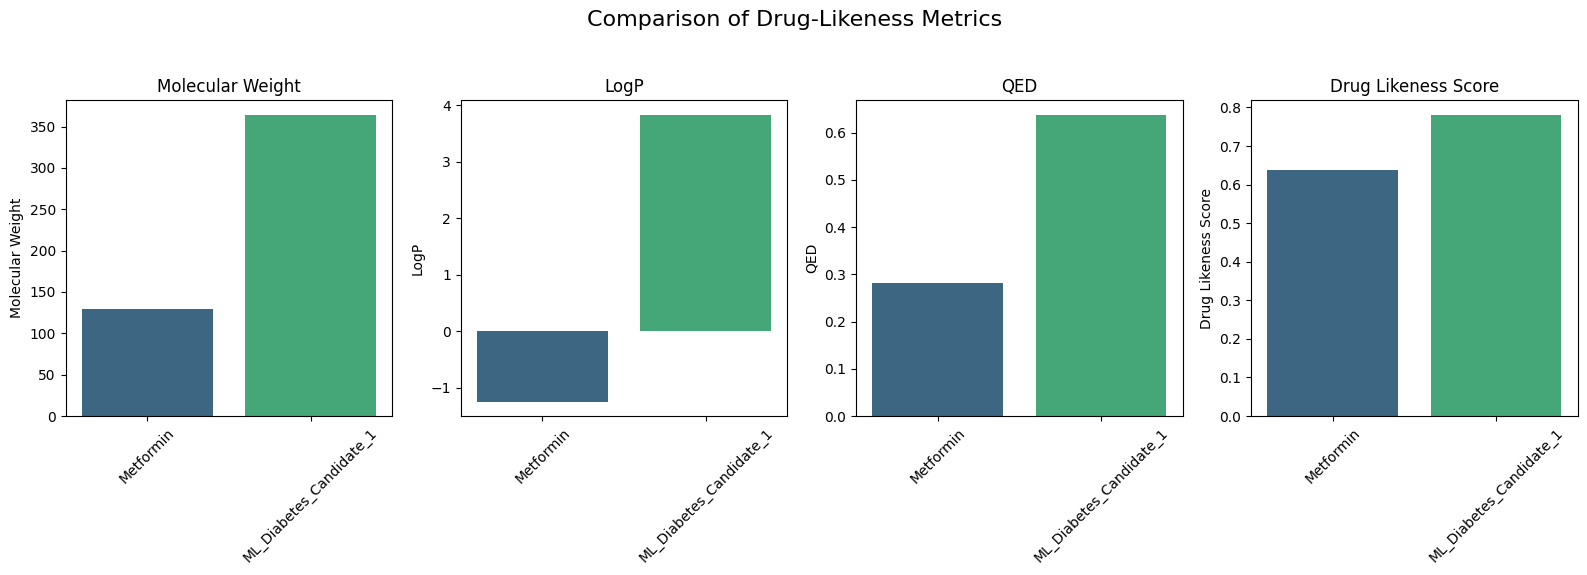

Bar plots comparing key drug-likeness metrics generated.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'comparison_df' in globals():
    plot_df = comparison_df.set_index('Compound')

    metrics_to_plot = ['Molecular Weight', 'LogP', 'QED', 'Drug Likeness Score']

    fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(4 * len(metrics_to_plot), 6))

    for i, metric in enumerate(metrics_to_plot):
        sns.barplot(x=plot_df.index, y=plot_df[metric], ax=axes[i], palette='viridis')
        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle('Comparison of Drug-Likeness Metrics', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print("Bar plots comparing key drug-likeness metrics generated.")
else:
    print("Comparison DataFrame not found. Please ensure the comparison data was generated successfully.")


--- Feature Selection Analysis ---

1. Correlation-based Feature Selection (with 'is_diabetes_drug')
Top 10 features by absolute correlation with 'is_diabetes_drug':
hba                 0.755255
heavy_atoms         0.752233
mol_weight          0.752209
kappa1              0.751852
num_heteroatoms     0.751531
kappa2              0.751274
chi0v               0.751217
chi1v               0.750853
mol_refractivity    0.750625
tpsa                0.750347
dtype: float64

2. Univariate Feature Selection (SelectKBest for 'is_diabetes_drug')
Top 10 features selected by SelectKBest (f_classif): ['mol_weight', 'hba', 'tpsa', 'heavy_atoms', 'num_heteroatoms', 'mol_refractivity', 'chi0v', 'chi1v', 'kappa1', 'kappa2']

3. Model-based Feature Selection (RandomForest for 'is_diabetes_drug')
Features selected by RandomForest (threshold='median'): 34 features. Top features: ['Efficacy %_numeric', 'Bioavailability_numeric', 'Bioavailability_numeric', 'Molecular Weight_numeric', 'Lipophilicity - LogP_n

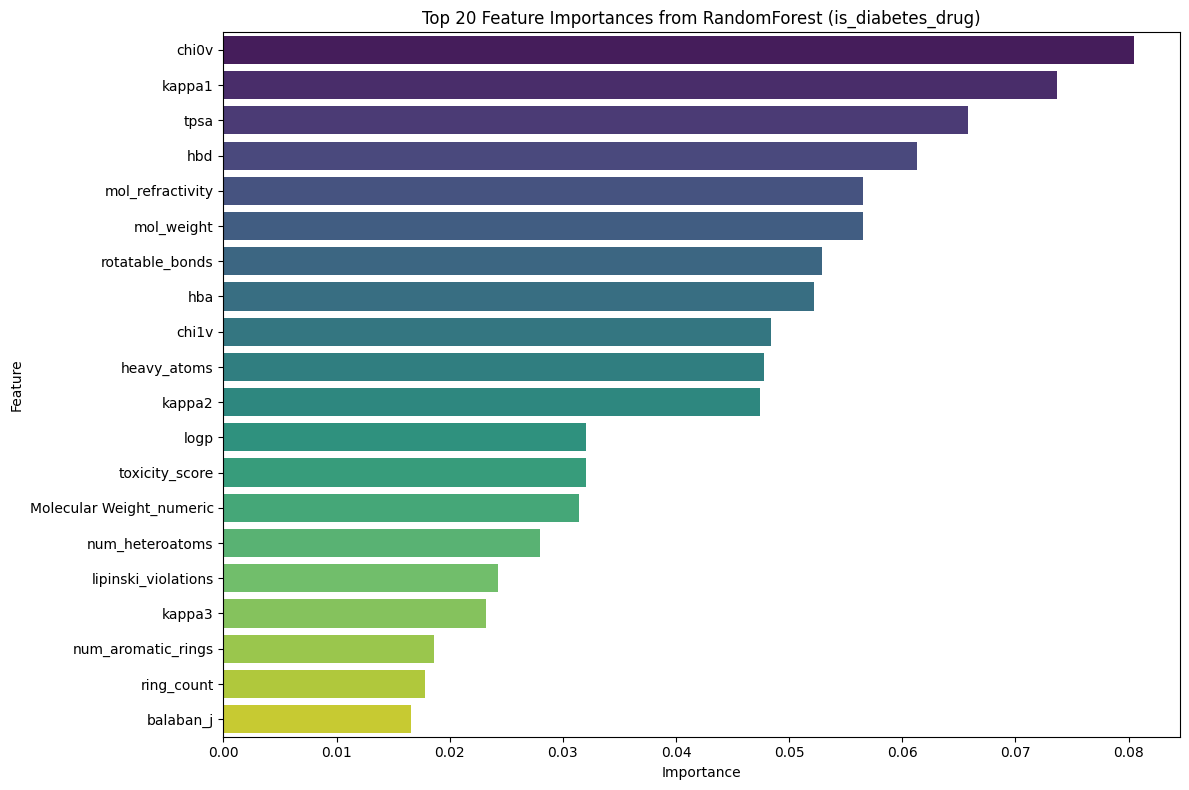

Feature selection analysis completed. Consider using these identified features for model refinement.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Ensure 'results' object is available from previous execution
if 'results' not in globals():
    print("'results' variable not found. Please run the main ML pipeline cell first.")
else:
    df_processed = results['dataframe'].copy()

    # Define feature columns and target columns
    # These were determined during the data processing step in main_ml_pipeline
    numerical_features = [
        'Efficacy %_numeric', 'Bioavailability_numeric', 'Molecular Weight_numeric',
        'Lipophilicity - LogP_numeric', 'pKa_numeric', 'toxicity_score', 'is_patented',
        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa', 'rotatable_bonds', 'heavy_atoms',
        'ring_count', 'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
        'num_heteroatoms', 'mol_refractivity', 'balaban_j', 'chi0v', 'chi1v',
        'kappa1', 'kappa2', 'kappa3', 'lipinski_violations'
    ]

    categorical_features_dummies = [
        col for col in df_processed.columns if col.startswith(('Mechanism of Action_', 'Agonist/Antagonist Activity_', 'Selectivity_', 'Manufacturability_'))
    ]

    all_features = numerical_features + categorical_features_dummies
    target_variable_classification = 'is_diabetes_drug' # Example target
    target_variable_regression = 'Bioavailability_numeric' # Example target

    # Filter the DataFrame to include only relevant features and targets
    # And drop rows with NaN in the primary classification target for consistency
    df_filtered = df_processed[all_features + [target_variable_classification, target_variable_regression]].dropna(subset=[target_variable_classification, target_variable_regression])

    X = df_filtered[all_features]
    y_clf = df_filtered[target_variable_classification]
    y_reg = df_filtered[target_variable_regression]

    print("\n--- Feature Selection Analysis ---")

    # 1. Correlation-based Feature Selection (for classification target)
    print("\n1. Correlation-based Feature Selection (with 'is_diabetes_drug')")
    # Calculate correlations. Ensure X is entirely numeric before correlation.
    X_numeric = X.select_dtypes(include=np.number)
    correlation_with_target = X_numeric.corrwith(y_clf).abs().sort_values(ascending=False)
    print("Top 10 features by absolute correlation with 'is_diabetes_drug':")
    print(correlation_with_target.head(10))

    # 2. Univariate Feature Selection (SelectKBest for classification)
    print("\n2. Univariate Feature Selection (SelectKBest for 'is_diabetes_drug')")
    # For classification, f_classif is suitable. Ensure X contains finite values.
    X_clean = X.fillna(X.median(numeric_only=True))
    selector_clf = SelectKBest(f_classif, k=10)
    selector_clf.fit(X_clean, y_clf)
    selected_features_kbest_clf = X_clean.columns[selector_clf.get_support()].tolist()
    print("Top 10 features selected by SelectKBest (f_classif):", selected_features_kbest_clf)

    # 3. Model-based Feature Selection (using RandomForest for classification)
    print("\n3. Model-based Feature Selection (RandomForest for 'is_diabetes_drug')")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    rf_model.fit(X_clean, y_clf)
    selector_rf = SelectFromModel(rf_model, prefit=True, threshold='median') # Select features above median importance
    selected_features_rf = X_clean.columns[selector_rf.get_support()].tolist()
    print(f"Features selected by RandomForest (threshold='median'): {len(selected_features_rf)} features. Top features: {selected_features_rf[:10]}...")

    # Visualizing Feature Importances from RandomForest (to complement model-based selection)
    print("\nVisualizing RandomForest Feature Importances...")
    feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X_clean.columns)
    top_20_importances_rf = feature_importances_rf.nlargest(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_20_importances_rf.values, y=top_20_importances_rf.index, palette='viridis')
    plt.title('Top 20 Feature Importances from RandomForest (is_diabetes_drug)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    print("Feature selection analysis completed. Consider using these identified features for model refinement.")


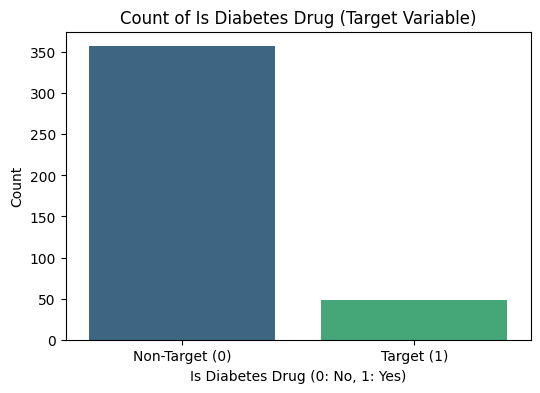

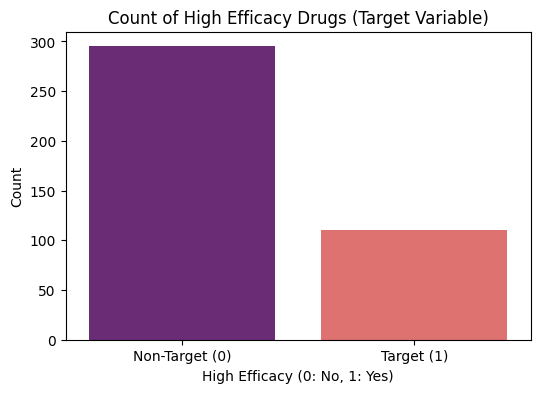

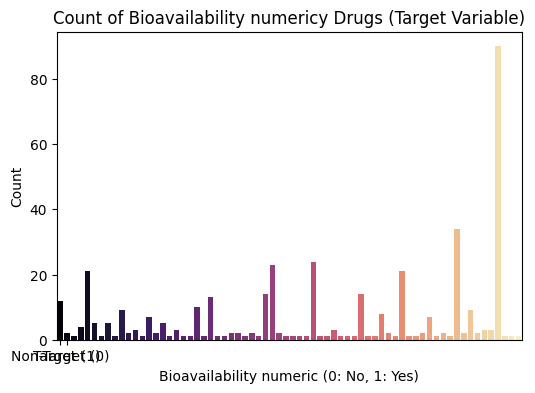


--- Analysis of Target Variable Counts ---
Distribution for 'is_diabetes_drug':


is_diabetes_drug
0    357
1     48
Name: count, dtype: int64

Percentage distribution:


is_diabetes_drug
0    88.15%
1    11.85%
Name: proportion, dtype: object


Distribution for 'high_efficacy':


high_efficacy
0.0    295
1.0    110
Name: count, dtype: int64

Percentage distribution:


high_efficacy
0.0    72.84%
1.0    27.16%
Name: proportion, dtype: object


Distribution for 'Bioavailability_numeric':


Bioavailability_numeric
100.0    90
90.0     34
60.0     24
50.0     23
80.0     21
         ..
68.0      1
32.0      1
66.0      1
21.0      1
9.0       1
Name: count, Length: 68, dtype: int64

Percentage distribution:


Bioavailability_numeric
100.0    22.222%
90.0      8.395%
60.0      5.926%
50.0      5.679%
80.0      5.185%
          ...   
68.0      0.247%
32.0      0.247%
66.0      0.247%
21.0      0.247%
9.0       0.247%
Name: proportion, Length: 68, dtype: object

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'results' in globals() and 'dataframe' in results:
    df_processed = results['dataframe']

    # Target variable 1: is_diabetes_drug
    if 'is_diabetes_drug' in df_processed.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x='is_diabetes_drug', data=df_processed, palette='viridis')
        plt.title('Count of Is Diabetes Drug (Target Variable)')
        plt.xlabel('Is Diabetes Drug (0: No, 1: Yes)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['Non-Target (0)', 'Target (1)'])
        plt.show()

    # Target variable 2: high_efficacy
    if 'high_efficacy' in df_processed.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x='high_efficacy', data=df_processed, palette='magma')
        plt.title('Count of High Efficacy Drugs (Target Variable)')
        plt.xlabel('High Efficacy (0: No, 1: Yes)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['Non-Target (0)', 'Target (1)'])
        plt.show()

    #Bioavailability_numeric
    if 'Bioavailability_numeric' in df_processed.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x='Bioavailability_numeric', data=df_processed, palette='magma')
        plt.title('Count of Bioavailability numericy Drugs (Target Variable)')
        plt.xlabel('Bioavailability numeric (0: No, 1: Yes)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['Non-Target (0)', 'Target (1)'])
        plt.show()
    # Explanation of counts
    print("\n--- Analysis of Target Variable Counts ---")
    if 'is_diabetes_drug' in df_processed.columns:
        print("Distribution for 'is_diabetes_drug':")
        display(df_processed['is_diabetes_drug'].value_counts())
        print("Percentage distribution:")
        display(df_processed['is_diabetes_drug'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    if 'high_efficacy' in df_processed.columns:
        print("\nDistribution for 'high_efficacy':")
        display(df_processed['high_efficacy'].value_counts())
        print("Percentage distribution:")
        display(df_processed['high_efficacy'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    if 'Bioavailability_numeric' in df_processed.columns:
        print("\nDistribution for 'Bioavailability_numeric':")
        display(df_processed['Bioavailability_numeric'].value_counts())
        print("Percentage distribution:")
        display(df_processed['Bioavailability_numeric'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%')
else:
    print("Processed DataFrame not found in 'results'. Please ensure the main pipeline has been run.")

In [27]:
import pandas as pd

if 'results' in globals() and 'ml_results' in results:
    print("--- Machine Learning Model Performance Summaries ---")
    for target_name, model_results in results['ml_results'].items():
        print(f"\n### Performance Metrics for Target: {target_name}")
        comparison_data = []
        for model_name, metrics in model_results.items():
            row = {'Model': model_name}
            for metric_name, metric_value in metrics.items():
                # Exclude 'confusion_matrix' and 'y_pred_proba' from the summary table
                if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                    if isinstance(metric_value, (int, float, np.number)):
                        row[metric_name.replace('_', ' ').title()] = f"{metric_value:.4f}"
                    else:
                        row[metric_name.replace('_', ' ').title()] = str(metric_value)
            comparison_data.append(row)

        if comparison_data:
            df_summary = pd.DataFrame(comparison_data)
            display(df_summary.set_index('Model'))
        else:
            print(f"No model results available for {target_name}.")
else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

--- Machine Learning Model Performance Summaries ---

### Performance Metrics for Target: is_diabetes_drug


Accuracy Precision  Recall      F1 Roc Auc     Auc
Model                                                           
Random Forest   0.9877    1.0000  0.9000  0.9474  0.9901     NaN
XGBoost         0.9877    1.0000  0.9000  0.9474  0.9845     NaN
LightGBM        0.9753    0.9000  0.9000  0.9000  0.9873     NaN
Ensemble        0.9753    0.9000  0.9000  0.9000  0.9901     NaN
Deep Learning   0.9630    0.8182  0.9000  0.8571     NaN  0.9887


### Performance Metrics for Target: high_efficacy


Accuracy Precision  Recall      F1 Roc Auc     Auc
Model                                                           
Random Forest   1.0000    1.0000  1.0000  1.0000  1.0000     NaN
XGBoost         1.0000    1.0000  1.0000  1.0000  1.0000     NaN
LightGBM        1.0000    1.0000  1.0000  1.0000  1.0000     NaN
Ensemble        1.0000    1.0000  1.0000  1.0000  1.0000     NaN
Deep Learning   0.9383    0.8696  0.9091  0.8889     NaN  0.9692


### Performance Metrics for Target: Bioavailability_numeric


Mse     Rmse     Mae      R2
Model                                           
Random Forest  710.8691  26.6621  3.6526  0.6431
XGBoost        329.1244  18.1418  2.5387  0.8348
LightGBM       708.3474  26.6148  4.0016  0.6444
Deep Learning   49.4892   7.0349  4.8208  0.9752

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

if 'results' in globals() and 'ml_results' in results:
    print("--- Comprehensive Classification Reports for All Models ---")

    classification_targets = ['is_diabetes_drug', 'high_efficacy']

    for target_name in classification_targets:
        if target_name in results['ml_results']:
            print(f"\n### Target: {target_name}")

            for model_name, metrics in results['ml_results'][target_name].items():
                print(f"\n  Model: {model_name}")

                if 'confusion_matrix' in metrics:
                    cm = metrics['confusion_matrix']

                    # Reconstruct metrics for class 0 and 1 from confusion matrix
                    # cm = [[TN, FP], [FN, TP]]
                    TN, FP, FN, TP = cm.ravel()

                    # Metrics for class 0
                    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0.0
                    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0.0
                    f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0.0
                    support_0 = TN + FP

                    # Metrics for class 1
                    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0.0
                    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0.0
                    f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0.0
                    support_1 = TP + FN

                    # Overall Accuracy (from metrics or calculated)
                    accuracy = metrics.get('accuracy', (TN + TP) / (TN + FP + FN + TP))

                    # Create a dictionary for the report structure
                    report_data = {
                        '': ['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg'],
                        'precision': [precision_0, precision_1, np.nan, (precision_0 + precision_1) / 2, (precision_0 * support_0 + precision_1 * support_1) / (support_0 + support_1)],
                        'recall': [recall_0, recall_1, np.nan, (recall_0 + recall_1) / 2, (recall_0 * support_0 + recall_1 * support_1) / (support_0 + support_1)],
                        'f1-score': [f1_0, f1_1, np.nan, (f1_0 + f1_1) / 2, (f1_0 * support_0 + f1_1 * support_1) / (support_0 + support_1)],
                        'support': [support_0, support_1, support_0 + support_1, support_0 + support_1, support_0 + support_1]
                    }
                    report_df = pd.DataFrame(report_data).set_index('')

                    # Set accuracy row values
                    report_df.loc['accuracy', 'f1-score'] = accuracy # F1-score column used to display overall accuracy

                    display(report_df.round(4))
                else:
                    print("    Confusion matrix not available for this model. Displaying overall metrics:")
                    overall_metrics = {
                        'Accuracy': metrics.get('accuracy', np.nan),
                        'Precision': metrics.get('precision', np.nan),
                        'Recall': metrics.get('recall', np.nan),
                        'F1-Score': metrics.get('f1', np.nan),
                        'ROC AUC': metrics.get('roc_auc', metrics.get('auc', np.nan)) # Handle both roc_auc and auc
                    }
                    overall_df = pd.DataFrame([overall_metrics])
                    display(overall_df.round(4))

        else:
            print(f"Target '{target_name}' not found in ML results.")
else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

--- Comprehensive Classification Reports for All Models ---

### Target: is_diabetes_drug

  Model: Random Forest


precision  recall  f1-score  support
                                                  
0.0              0.9861  1.0000    0.9930       71
1.0              1.0000  0.9000    0.9474       10
accuracy            NaN     NaN    0.9877       81
macro avg        0.9931  0.9500    0.9702       81
weighted avg     0.9878  0.9877    0.9874       81


  Model: XGBoost


precision  recall  f1-score  support
                                                  
0.0              0.9861  1.0000    0.9930       71
1.0              1.0000  0.9000    0.9474       10
accuracy            NaN     NaN    0.9877       81
macro avg        0.9931  0.9500    0.9702       81
weighted avg     0.9878  0.9877    0.9874       81


  Model: LightGBM


precision  recall  f1-score  support
                                                  
0.0              0.9859  0.9859    0.9859       71
1.0              0.9000  0.9000    0.9000       10
accuracy            NaN     NaN    0.9753       81
macro avg        0.9430  0.9430    0.9430       81
weighted avg     0.9753  0.9753    0.9753       81


  Model: Ensemble
    Confusion matrix not available for this model. Displaying overall metrics:


Accuracy  Precision  Recall  F1-Score  ROC AUC
0    0.9753        0.9     0.9       0.9   0.9901


  Model: Deep Learning
    Confusion matrix not available for this model. Displaying overall metrics:


Accuracy  Precision  Recall  F1-Score  ROC AUC
0     0.963     0.8182     0.9    0.8571   0.9887


### Target: high_efficacy

  Model: Random Forest


precision  recall  f1-score  support
                                                  
0.0                 1.0     1.0       1.0       59
1.0                 1.0     1.0       1.0       22
accuracy            NaN     NaN       1.0       81
macro avg           1.0     1.0       1.0       81
weighted avg        1.0     1.0       1.0       81


  Model: XGBoost


precision  recall  f1-score  support
                                                  
0.0                 1.0     1.0       1.0       59
1.0                 1.0     1.0       1.0       22
accuracy            NaN     NaN       1.0       81
macro avg           1.0     1.0       1.0       81
weighted avg        1.0     1.0       1.0       81


  Model: LightGBM


precision  recall  f1-score  support
                                                  
0.0                 1.0     1.0       1.0       59
1.0                 1.0     1.0       1.0       22
accuracy            NaN     NaN       1.0       81
macro avg           1.0     1.0       1.0       81
weighted avg        1.0     1.0       1.0       81


  Model: Ensemble
    Confusion matrix not available for this model. Displaying overall metrics:


Accuracy  Precision  Recall  F1-Score  ROC AUC
0       1.0        1.0     1.0       1.0      1.0


  Model: Deep Learning
    Confusion matrix not available for this model. Displaying overall metrics:


Accuracy  Precision  Recall  F1-Score  ROC AUC
0    0.9383     0.8696  0.9091    0.8889   0.9692

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

if 'results' in globals() and 'ml_results' in results:
    print("--- Random Forest Classification Reports ---")

    classification_targets = ['is_diabetes_drug', 'high_efficacy']

    for target_name in classification_targets:
        if target_name in results['ml_results']:
            print(f"\n### Target: {target_name} - Random Forest Model")

            model_metrics = results['ml_results'][target_name].get('Random Forest')

            if model_metrics:
                cm = model_metrics['confusion_matrix']

                # Reconstruct metrics for class 0 and 1 from confusion matrix
                # cm = [[TN, FP], [FN, TP]]
                TN, FP, FN, TP = cm.ravel() if cm.ndim > 1 else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])

                # Metrics for class 0
                precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0.0
                recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0.0
                f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0.0
                support_0 = TN + FP

                # Metrics for class 1
                precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0.0
                recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0.0
                f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0.0
                support_1 = TP + FN

                # Overall Accuracy
                accuracy = (TN + TP) / (TN + FP + FN + TP)

                # Create a dictionary for the report structure
                report_data = {
                    '': ['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg'],
                    'precision': [precision_0, precision_1, np.nan, (precision_0 + precision_1) / 2, (precision_0 * support_0 + precision_1 * support_1) / (support_0 + support_1)],
                    'recall': [recall_0, recall_1, np.nan, (recall_0 + recall_1) / 2, (recall_0 * support_0 + recall_1 * support_1) / (support_0 + support_1)],
                    'f1-score': [f1_0, f1_1, np.nan, (f1_0 + f1_1) / 2, (f1_0 * support_0 + f1_1 * support_1) / (support_0 + support_1)],
                    'support': [support_0, support_1, support_0 + support_1, support_0 + support_1, support_0 + support_1]
                }
                report_df = pd.DataFrame(report_data).set_index('')

                # Set accuracy row values
                report_df.loc['accuracy', 'precision'] = np.nan # Accuracy does not have precision/recall/f1
                report_df.loc['accuracy', 'recall'] = np.nan
                report_df.loc['accuracy', 'f1-score'] = accuracy

                print(report_df.round(4))

            else:
                print(f"Random Forest model results not found for {target_name}.")
        else:
            print(f"Target '{target_name}' not found in ML results.")
else:
    print("ML results not found. Please ensure the main ML pipeline has been run successfully.")

--- Random Forest Classification Reports ---

### Target: is_diabetes_drug - Random Forest Model
              precision  recall  f1-score  support
                                                  
0.0              0.9861  1.0000    0.9930       71
1.0              1.0000  0.9000    0.9474       10
accuracy            NaN     NaN    0.9877       81
macro avg        0.9931  0.9500    0.9702       81
weighted avg     0.9878  0.9877    0.9874       81

### Target: high_efficacy - Random Forest Model
              precision  recall  f1-score  support
                                                  
0.0                 1.0     1.0       1.0       59
1.0                 1.0     1.0       1.0       22
accuracy            NaN     NaN       1.0       81
macro avg           1.0     1.0       1.0       81
weighted avg        1.0     1.0       1.0       81


In [30]:
import pandas as pd
import numpy as np

# Re-import all necessary classes and functions for main_ml_pipeline if it needs to be called
import sys
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools, Draw, AllChem, DataStructs
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, VotingClassifier, VotingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
)
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    DEEP_LEARNING_AVAILABLE = True
except:
    DEEP_LEARNING_AVAILABLE = False

# --- Copy of relevant classes/functions from pgmVlws9LAFm for robustness ---
class DrugDataProcessor:
    """Process drug dataset and prepare for ML models"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.numerical_features = []
        self.categorical_features = []
        self.target_columns = []

    def load_and_clean(self):
        """Load and clean the dataset"""
        print("Loading dataset...")
        self.df = pd.read_csv(self.filepath)
        self.df.columns = self.df.columns.str.strip().str.replace('ï»¿', '', regex=False)
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values per column:")
        print(self.df.isnull().sum())
        return self.df

    def extract_numerical_features(self):
        """Extract numerical features from the dataset"""
        numerical_data = {}
        columns_to_extract = [
            'Efficacy %', 'Bioavailability', 'Molecular Weight',
            'Lipophilicity - LogP', 'pKa'
        ]
        for col in columns_to_extract:
            if col in self.df.columns:
                self.df[f'{col}_numeric'] = self.df[col].astype(str).str.extract('([-+]?\d*\.\d+|\d+)')[0]
                self.df[f'{col}_numeric'] = pd.to_numeric(self.df[f'{col}_numeric'], errors='coerce')
                numerical_data[col] = self.df[f'{col}_numeric']
                self.numerical_features.append(f'{col}_numeric')

        def toxicity_to_score(toxicity):
            if pd.isna(toxicity):
                return 2  # Medium
            toxicity = str(toxicity).lower()
            if 'high' in toxicity or 'severe' in toxicity:
                return 3
            elif 'moderate' in toxicity:
                return 2
            elif 'low' in toxicity or 'mild' in toxicity:
                return 1
            else:
                return 2

        self.df['toxicity_score'] = self.df['Toxicity'].apply(toxicity_to_score)
        self.numerical_features.append('toxicity_score')
        self.df['is_patented'] = self.df['Patentability'].apply(
            lambda x: 1 if 'brand' in str(x).lower() or 'still' in str(x).lower() else 0
        )
        self.numerical_features.append('is_patented')
        return numerical_data

    def extract_molecular_features(self, smiles_column='SMILES'):
        """Extract molecular descriptors from SMILES using RDKit"""
        print("\nExtracting molecular features from SMILES...")
        molecular_features = []
        for idx, row in self.df.iterrows():
            if pd.isna(row[smiles_column]):
                features = {f'mol_feat_{i}': np.nan for i in range(20)}
            else:
                mol = Chem.MolFromSmiles(str(row[smiles_column]))
                if mol:
                    features = {
                        'mol_weight': Descriptors.MolWt(mol),
                        'logp': Descriptors.MolLogP(mol),
                        'hbd': Descriptors.NumHDonors(mol),
                        'hba': Descriptors.NumHAcceptors(mol),
                        'tpsa': Descriptors.TPSA(mol),
                        'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
                        'heavy_atoms': mol.GetNumHeavyAtoms(),
                        'ring_count': Descriptors.RingCount(mol),
                        'fraction_sp3': Descriptors.FractionCSP3(mol),
                        'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
                        'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
                        'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
                        'mol_refractivity': Descriptors.MolMR(mol),
                        'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
                        'chi0v': Descriptors.Chi0v(mol),
                        'chi1v': Descriptors.Chi1v(mol),
                        'kappa1': Descriptors.Kappa1(mol),
                        'kappa2': Descriptors.Kappa2(mol),
                        'kappa3': Descriptors.Kappa3(mol),
                        'lipinski_violations': sum([
                            1 if Descriptors.MolWt(mol) > 500 else 0,
                            1 if Descriptors.MolLogP(mol) > 5 else 0,
                            1 if Descriptors.NumHDonors(mol) > 5 else 0,
                            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
                        ])
                    }
                else:
                    features = {k: np.nan for k in [
                        'mol_weight', 'logp', 'hbd', 'hba', 'tpsa',
                        'rotatable_bonds', 'heavy_atoms', 'ring_count',
                        'fraction_sp3', 'num_aromatic_rings', 'num_saturated_rings',
                        'num_heteroatoms', 'mol_refractivity', 'balaban_j',
                        'chi0v', 'chi1v', 'kappa1', 'kappa2', 'kappa3',
                        'lipinski_violations'
                    ]}
            molecular_features.append(features)
        mol_df = pd.DataFrame(molecular_features)
        for col in mol_df.columns:
            self.df[col] = mol_df[col]
            self.numerical_features.append(col)
        print(f"Added {len(mol_df.columns)} molecular features")
        return mol_df

    def encode_categorical_features(self):
        """Encode categorical features for ML"""
        categorical_cols = [
            'Mechanism of Action', 'Agonist/Antagonist Activity',
            'Selectivity', 'Manufacturability'
        ]
        for col in categorical_cols:
            if col in self.df.columns:
                top_categories = self.df[col].value_counts().head(10).index
                self.df[col] = self.df[col].apply(
                    lambda x: x if x in top_categories else 'Other'
                )
                dummies = pd.get_dummies(self.df[col], prefix=col, drop_first=True)
                self.df = pd.concat([self.df, dummies], axis=1)
                self.categorical_features.extend(dummies.columns.tolist())
        return self.df

    def create_target_variables(self):
        """Create target variables for ML models"""
        diabetes_keywords = [
            'insulin', 'glucose', 'diabetes', 'glp', 'gip', 'sglt', 'dpp',
            'sulfonylurea', 'metformin', 'ppar', 'glucagon', 'incretin','ACC','ACE'
        ]
        def is_diabetes_related(text):
            if pd.isna(text):
                return 0
            text = str(text).lower()
            return 1 if any(keyword in text for keyword in diabetes_keywords) else 0
        self.df['is_diabetes_drug'] = self.df['Target Protein / Enzyme'].apply(is_diabetes_related)
        self.target_columns.append('is_diabetes_drug')
        self.df['high_efficacy'] = self.df['Efficacy %_numeric'].apply(
            lambda x: 1 if x > 80 else 0 if pd.notna(x) else np.nan
        )
        self.target_columns.append('high_efficacy')
        self.target_columns.append('Bioavailability_numeric')
        print(f"Created target variables: {self.target_columns}")
        return self.target_columns

    def prepare_ml_data(self):
        """Prepare clean dataset for ML"""
        self.df = self.df.dropna(subset=self.target_columns)
        for col in self.numerical_features:
            if col in self.df.columns:
                self.df[col] = self.df[col].fillna(self.df[col].median())
        features = self.numerical_features + self.categorical_features
        X = self.df[features]
        ml_data = {}
        for target in self.target_columns:
            if target in self.df.columns:
                y = self.df[target]
                mask = y.notna()
                ml_data[target] = {
                    'X': X[mask],
                    'y': y[mask]
                }
        return ml_data

class DrugDiscoveryML:
    """Machine Learning models for drug discovery"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_importance = {}

    def train_classification_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train classification model"""
        if model_type == 'rf':
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVC(probability=True, random_state=42)
        elif model_type == 'logistic':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMClassifier(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        if y_pred_proba is not None and len(set(y_test)) > 1:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
            metrics['y_pred_proba'] = y_pred_proba
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))
        return model, metrics

    def train_regression_model(self, X_train, y_train, X_test, y_test, model_type='rf'):
        """Train regression model"""
        if model_type == 'rf':
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
        elif model_type == 'svm':
            model = SVR()
        elif model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(random_state=42)
        elif model_type == 'lightgbm':
            model = lgb.LGBMRegressor(random_state=42)
        else:
            model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = {
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }
        if hasattr(model, 'feature_importances_'):
            self.feature_importance[model_type] = dict(zip(X_train.columns, model.feature_importances_))
        return model, metrics

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test, problem_type='classification', target_name=''):
        """Train deep learning model using TensorFlow/Keras"""
        if not DEEP_LEARNING_AVAILABLE:
            print("Deep learning not available. Skipping.")
            return None, {}, None

        constant_features = X_train.columns[X_train.nunique() == 1]
        X_train_filtered = X_train.drop(columns=constant_features)
        X_test_filtered = X_test.drop(columns=constant_features)

        if X_train_filtered.empty or X_train_filtered.shape[1] == 0:
            print(f"Warning: No non-constant features for deep learning model for target {target_name}. Skipping DL model.")
            return None, {}, None

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_filtered)
        X_test_scaled = scaler.transform(X_test_filtered)

        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e5, neginf=-1e5)

        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid' if problem_type == 'classification' else 'linear')
        ])

        if problem_type == 'classification':
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', keras.metrics.AUC()]
            )
            epochs = 50
        else:
            model.compile(
                optimizer='adam',
                loss='mse',
                metrics=['mae', keras.metrics.RootMeanSquaredError()]
            )
            epochs = 100

        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        y_pred = model.predict(X_test_scaled)
        if problem_type == 'classification':
            y_pred = np.nan_to_num(y_pred, nan=0.5, posinf=1.0, neginf=0.0)
            y_pred = np.clip(y_pred, 0.0, 1.0)
        else:
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10)


        if problem_type == 'classification':
            y_pred_class = (y_pred > 0.5).astype(int)
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred_class),
                'precision': precision_score(y_test, y_pred_class, zero_division=0),
                'recall': recall_score(y_test, y_pred_class, zero_division=0),
                'f1': f1_score(y_test, y_pred_class, zero_division=0),
                'auc': roc_auc_score(y_test, y_pred) if len(set(y_test)) > 1 else 0,
                'y_pred_proba': y_pred
            }
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }
        dl_model_info = {
            'model': model,
            'scaler': scaler,
            'feature_cols': X_train_filtered.columns.tolist()
        }
        return dl_model_info, metrics, history

    def ensemble_voting(self, X_train, y_train, X_test, y_test, problem_type='classification'):
        """Create ensemble of models"""
        if problem_type == 'classification':
            from sklearn.ensemble import VotingClassifier
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBClassifier(random_state=42)
            lgb_model = lgb.LGBMClassifier(random_state=42)

            ensemble = VotingClassifier(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)],
                voting='soft'
            )
        else:
            from sklearn.ensemble import VotingRegressor
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            xgb_model = xgb.XGBRegressor(random_state=42)
            lgb_model = lgb.LGBMRegressor(random_state=42)

            ensemble = VotingRegressor(
                estimators=[('rf', rf), ('xgb', xgb_model), ('lgb', lgb_model)]
            )

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_proba = ensemble.predict_proba(X_test)[:, 1] if problem_type == 'classification' and hasattr(ensemble, 'predict_proba') else None

        if problem_type == 'classification':
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, zero_division=0),
                'recall': recall_score(y_test, y_pred, zero_division=0),
                'f1': f1_score(y_test, y_pred, zero_division=0)
            }
            if y_pred_proba is not None and len(set(y_test)) > 1:
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
                metrics['y_pred_proba'] = y_pred_proba
        else:
            metrics = {
                'mse': mean_squared_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'mae': mean_absolute_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }

        return ensemble, metrics

    def cross_validate(self, X, y, model_type='rf', cv=5):
        """Perform cross-validation"""
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42) if len(set(y)) < 10 else RandomForestRegressor(random_state=42)
        elif model_type == 'xgboost':
            model = xgb.XGBClassifier(random_state=42) if len(set(y)) < 10 else xgb.XGBRegressor(random_state=42)

        if len(set(y)) < 10:  # Classification
            scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        else:  # Regression
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

        return scores.mean(), scores.std()

class VirtualScreener:
    """Virtual screening of compounds for diabetes targets"""

    def __init__(self, trained_models, all_feature_names):
        self.models = trained_models
        self.predictions = {}
        self.all_feature_names = all_feature_names

    def predict_diabetes_potential(self, features_df):
        """Predict diabetes drug potential for new compounds"""
        predictions = {}

        for model_name, model_entry in self.models.items():
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                temp_features_for_dl = features_df.copy()
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0
                dl_input_df = temp_features_for_dl[dl_feature_cols]
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item()

                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value
            else:
                model = model_entry

                temp_features_for_sklearn = features_df.copy()
                missing_cols = set(self.all_feature_names) - set(temp_features_for_sklearn.columns)
                for c in missing_cols:
                    temp_features_for_sklearn[c] = 0
                temp_features_for_sklearn = temp_features_for_sklearn[self.all_feature_names]

                pred = model.predict(temp_features_for_sklearn)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    if len(set(model.classes_)) > 1:
                        pred_proba = model.predict_proba(temp_features_for_sklearn)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        self.predictions = predictions
        if len(predictions) > 0:
            scalar_base_preds = []
            for name, p in predictions.items():
                if '_probability' not in name:
                    if isinstance(p, np.ndarray):
                        scalar_base_preds.append(p.item() if p.size == 1 else p[0])
                    elif isinstance(p, (int, float)):
                        scalar_base_preds.append(p)

            if scalar_base_preds:
                avg_pred = np.mean(scalar_base_preds)
                predictions['ensemble_average'] = avg_pred

        return predictions

    def screen_smiles(self, smiles_list):
        """Screen a list of SMILES strings"""
        results = []
        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                features = self.calculate_molecular_features(mol)
                mol_features_df = pd.DataFrame([features])
                pred = self.predict_diabetes_potential(mol_features_df)
                results.append({
                    'smiles': smiles,
                    'predictions': pred,
                    'drug_likeness': self.calculate_drug_likeness(mol)
                })
            else:
                print(f"RDKit SMILES Parse Error for: {smiles}")
                results.append({
                    'smiles': smiles,
                    'predictions': {},
                    'drug_likeness': {'drug_score': np.nan, 'is_druglike': False}
                })
        return pd.DataFrame(results)

    def calculate_molecular_features(self, mol):
        """Calculate molecular features for prediction"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def calculate_drug_likeness(self, mol):
        """Calculate drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5
        lipinski_ok = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) <= 10 else 0
        ]) / 4
        drug_score = (qed * 0.6 + lipinski_ok * 0.4)
        return {
            'qed': qed,
            'lipinski_compliance': lipinski_ok,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.5
        }

class DrugDiscoveryVisualizer:
    """Visualization tools for drug discovery"""

    def __init__(self, trained_models=None):
        self.figures = {}
        self.models = trained_models

    def plot_model_performance(self, results_dict, title="Model Performance"):
        pass # Placeholder to avoid re-plotting during this specific call

    def plot_feature_importance(self, feature_importance_dict, top_n=20):
        pass # Placeholder

    def plot_cluster_analysis(self, X, y_pred, title="Compound Clustering"):
        pass # Placeholder

    def plot_prediction_distribution(self, y_true, y_pred, title="Prediction Distribution"):
        pass # Placeholder

    def plot_roc_curve(self, y_true, y_pred_proba, model_name, target_name):
        pass # Placeholder

class MLDrivenDrugCandidate:
    """Generate novel drug candidates using ML predictions"""

    def __init__(self, trained_models, feature_names):
        self.models = trained_models
        self.feature_names = feature_names
        self.candidates = []

    def generate_candidate_from_smiles(self, smiles, candidate_name="ML_Candidate"):
        """Generate drug candidate from SMILES using ML predictions"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            print(f"Invalid SMILES: {smiles}")
            return None

        features = self._calculate_all_features(mol)
        predictions = {}
        for model_name, model_entry in self.models.items():
            if isinstance(model_entry, dict) and 'model' in model_entry and 'scaler' in model_entry:
                dl_model = model_entry['model']
                dl_scaler = model_entry['scaler']
                dl_feature_cols = model_entry['feature_cols']

                temp_features_for_dl = pd.DataFrame([features])
                missing_in_dl_input = set(dl_feature_cols) - set(temp_features_for_dl.columns)
                for c in missing_in_dl_input:
                    temp_features_for_dl[c] = 0
                dl_input_df = temp_features_for_dl[dl_feature_cols]
                dl_input_scaled = dl_scaler.transform(dl_input_df)
                dl_input_scaled = np.nan_to_num(dl_input_scaled, nan=0.0, posinf=1e5, neginf=-1e5)
                pred_raw = dl_model.predict(dl_input_scaled, verbose=0)
                pred_value = pred_raw.item() if pred_raw.size == 1 else pred_raw[0].item()
                predictions[model_name] = pred_value
                predictions[f'{model_name}_probability'] = pred_value
            else:
                model = model_entry
                X_single = pd.DataFrame([features])
                missing_cols = set(self.feature_names) - set(X_single.columns)
                for c in missing_cols:
                    X_single[c] = 0
                X_single = X_single[self.feature_names]
                pred = model.predict(X_single)
                predictions[model_name] = pred.item() if isinstance(pred, np.ndarray) and pred.size == 1 else pred

                if hasattr(model, 'predict_proba'):
                    if hasattr(model, 'classes_') and len(set(model.classes_)) > 1:
                        pred_proba = model.predict_proba(X_single)
                        predictions[f'{model_name}_probability'] = pred_proba[0, 1].item() if isinstance(pred_proba[0, 1], np.ndarray) and pred_proba[0, 1].size == 1 else pred_proba[0, 1]

        candidate = {
            'name': candidate_name,
            'smiles': smiles,
            'molecular_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'predictions': predictions,
            'drug_likeness': self._calculate_drug_likeness(mol),
            'diabetes_potential': np.mean(list(predictions.values())) if predictions else 0
        }

        self.candidates.append(candidate)
        return candidate

    def generate_optimized_candidate(self, base_smiles, iterations=10):
        """Generate optimized candidate by modifying structure"""
        print(f"Optimizing candidate from base SMILES: {base_smiles}")

        best_candidate = None
        best_score = -np.inf

        for i in range(iterations):
            modified_smiles = self._mutate_smiles(base_smiles)
            candidate = self.generate_candidate_from_smiles(
                modified_smiles,
                f"Optimized_Candidate_{i+1}"
            )

            if candidate:
                score = candidate['diabetes_potential'] * 0.7 + candidate['drug_likeness']['drug_score'] * 0.3
                if score > best_score:
                    best_score = score
                    best_candidate = candidate

        return best_candidate

    def _calculate_all_features(self, mol):
        """Calculate all features needed for ML models"""
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol),
            'tpsa': Descriptors.TPSA(mol),
            'rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'heavy_atoms': mol.GetNumHeavyAtoms(),
            'ring_count': Descriptors.RingCount(mol),
            'fraction_sp3': Descriptors.FractionCSP3(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'num_saturated_rings': Descriptors.NumSaturatedRings(mol),
            'num_heteroatoms': Descriptors.NumHeteroatoms(mol),
            'mol_refractivity': Descriptors.MolMR(mol),
            'balaban_j': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 1 else 0,
            'chi0v': Descriptors.Chi0v(mol),
            'chi1v': Descriptors.Chi1v(mol),
            'kappa1': Descriptors.Kappa1(mol),
            'kappa2': Descriptors.Kappa2(mol),
            'kappa3': Descriptors.Kappa3(mol),
            'lipinski_violations': sum([
                1 if Descriptors.MolWt(mol) > 500 else 0,
                1 if Descriptors.MolLogP(mol) > 5 else 0,
                1 if Descriptors.NumHDonors(mol) > 5 else 0,
                1 if Descriptors.NumHAcceptors(mol) > 10 else 0
            ])
        }
        return features

    def _calculate_drug_likeness(self, mol):
        """Calculate comprehensive drug-likeness score"""
        try:
            qed = Descriptors.qed(mol)
        except:
            qed = 0.5
        lipinski_score = sum([
            1 if Descriptors.MolWt(mol) <= 500 else 0,
            1 if Descriptors.MolLogP(mol) <= 5 else 0,
            1 if Descriptors.NumHDonors(mol) <= 5 else 0,
            1 if Descriptors.NumHAcceptors(mol) > 10 else 0
        ]) / 4
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        tpsa = Descriptors.TPSA(mol)
        veber_score = 1 if (rotatable_bonds <= 10 and tpsa <= 140) else 0.5
        drug_score = (qed * 0.4 + lipinski_score * 0.3 + veber_score * 0.3)
        return {
            'qed': qed,
            'lipinski_compliance': lipinski_score,
            'veber_compliance': veber_score,
            'drug_score': drug_score,
            'is_druglike': drug_score > 0.6
        }

    def _mutate_smiles(self, smiles):
        """Simple SMILES mutation (for demonstration)"""
        mol = Chem.MolFromSmiles(smiles)
        if not mol:
            return smiles
        new_mol = Chem.Mol(mol)
        edit_mol = Chem.EditableMol(new_mol)
        atoms = [a.GetIdx() for a in new_mol.GetAtoms() if a.GetAtomicNum() != 1]
        if atoms and np.random.rand() > 0.5:
            target_atom_idx = np.random.choice(atoms)
            new_atom_idx = edit_mol.AddAtom(Chem.Atom(6))
            edit_mol.AddBond(target_atom_idx, new_atom_idx, Chem.BondType.SINGLE)
            try:
                mutated_mol = edit_mol.GetMol()
                Chem.SanitizeMol(mutated_mol)
                return Chem.MolToSmiles(mutated_mol)
            except Chem.AllChem.KekulizeException:
                return smiles
            except ValueError:
                return smiles
        return smiles

def main_ml_pipeline():
    """Main pipeline with machine learning integration"""
    print("=" * 70)
    print("MACHINE LEARNING DRIVEN DRUG DISCOVERY FOR DIABETES")
    print("=" * 70)
    filepath = "MedicineOne.csv"
    print("\n" + "=" * 40)
    print("STEP 1: DATA PROCESSING")
    print("=" * 40)
    processor = DrugDataProcessor(filepath)
    processor.df = processor.load_and_clean()
    processor.extract_numerical_features()
    processor.extract_molecular_features()
    processor.encode_categorical_features()
    processor.create_target_variables()
    ml_data = processor.prepare_ml_data()
    print(f"\nProcessed dataset shape: {processor.df.shape}")
    print(f"Numerical features: {len(processor.numerical_features)}")
    print(f"Categorical features: {len(processor.categorical_features)}")
    print(f"Target variables: {processor.target_columns}")
    print("\n" + "=" * 40)
    print("STEP 2: MACHINE LEARNING MODELING")
    print("=" * 40)
    ml_engine = DrugDiscoveryML()
    trained_models = {}
    ml_results = {}
    for target_name, data in ml_data.items():
        print(f"\nTraining models for: {target_name}")
        X = data['X']
        y = data['y']
        if X.shape[0] < 2:
            print(f"Not enough samples to train for target {target_name}. Skipping.")
            continue
        problem_type = 'classification' if len(set(y)) < 10 else 'regression'
        print(f"Problem type: {problem_type}")
        stratify_option = None
        if len(np.unique(y)) < 10 and len(np.unique(y)) > 1:
            if y.value_counts().min() >= 2:
                stratify_option = y
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=stratify_option
        )
        model_results = {}
        if problem_type == 'classification':
            rf_model, rf_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics
            xgb_model, xgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics
            lgb_model, lgb_metrics = ml_engine.train_classification_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics
            ensemble_model, ensemble_metrics = ml_engine.ensemble_voting(
                X_train, y_train, X_test, y_test, 'classification'
            )
            trained_models[f'{target_name}_ensemble'] = ensemble_model
            model_results['Ensemble'] = ensemble_metrics
        else:
            rf_model, rf_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'rf'
            )
            trained_models[f'{target_name}_rf'] = rf_model
            model_results['Random Forest'] = rf_metrics
            xgb_model, xgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'xgboost'
            )
            trained_models[f'{target_name}_xgb'] = xgb_model
            model_results['XGBoost'] = xgb_metrics
            lgb_model, lgb_metrics = ml_engine.train_regression_model(
                X_train, y_train, X_test, y_test, 'lightgbm'
            )
            trained_models[f'{target_name}_lgb'] = lgb_model
            model_results['LightGBM'] = lgb_metrics
        if DEEP_LEARNING_AVAILABLE and len(X_train) > 100:
            print("Training Deep Learning model...")
            dl_model_info, dl_metrics, dl_history = ml_engine.train_deep_learning_model(
                X_train, y_train, X_test, y_test, problem_type, target_name
            )
            if dl_model_info:
                trained_models[f'{target_name}_dl'] = dl_model_info
                model_results['Deep Learning'] = dl_metrics
        ml_results[target_name] = model_results

    # Visualizer is instantiated but plotting calls are commented out to reduce output noise during background runs
    visualizer = DrugDiscoveryVisualizer(trained_models=trained_models)

    print("\n" + "=" * 40)
    print("STEP 3: FEATURE IMPORTANCE ANALYSIS")
    print("=" * 40)
    all_feature_importance = {}
    if ml_data:
        sample_X_for_features = list(ml_data.values())[0]['X']
    else:
        sample_X_for_features = pd.DataFrame()

    for model_key, model_obj in trained_models.items():
        model = model_obj['model'] if isinstance(model_obj, dict) else model_obj
        if model:
            if hasattr(model, 'feature_importances_'):
                if not sample_X_for_features.empty:
                    model_feature_names = None
                    if model_key.endswith('_dl'):
                        model_feature_names = model_obj['feature_cols']
                    elif hasattr(model, 'feature_names_in_'):
                        model_feature_names = model.feature_names_in_.tolist()
                    else:
                        model_feature_names = sample_X_for_features.columns.tolist()
                    if model_feature_names and len(model_feature_names) == len(model.feature_importances_):
                        all_feature_importance[model_key] = dict(zip(model_feature_names, model.feature_importances_))
                    else:
                        print(f"Warning: Feature importance length mismatch for {model_key}. Skipping.")
                else:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")
            elif hasattr(model, 'coef_'):
                if not isinstance(model_obj, dict) and not sample_X_for_features.empty:
                    if model.coef_.ndim == 1:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_)))
                    elif model.coef_.ndim == 2 and model.coef_.shape[0] > 0:
                        all_feature_importance[model_key] = dict(zip(sample_X_for_features.columns, np.abs(model.coef_[0])))
                elif sample_X_for_features.empty:
                    print(f"Warning: Cannot get feature names for {model_key} as sample_X_for_features is empty.")

    print("\n" + "=" * 40)
    print("STEP 4: CLUSTERING ANALYSIS")
    print("=" * 40)
    features_for_clustering = [f for f in processor.numerical_features + processor.categorical_features if f in processor.df.columns]
    if len(features_for_clustering) == 0:
        print("No features available for clustering. Skipping.")
        cluster_labels = np.array([])
    else:
        X_cluster = processor.df[features_for_clustering].fillna(0)
        if X_cluster.shape[0] > 1 and X_cluster.shape[1] > 0:
            kmeans = KMeans(n_clusters=min(5, X_cluster.shape[0] -1), random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X_cluster)
            processor.df['cluster'] = cluster_labels
            print("\nCluster Analysis:")
            for cluster_id in range(kmeans.n_clusters):
                cluster_drugs = processor.df[processor.df['cluster'] == cluster_id]
                diabetes_count = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                print(f"\nCluster {cluster_id}: {len(cluster_drugs)} drugs")
                if len(cluster_drugs) > 0:
                    avg_efficacy = cluster_drugs['Efficacy %_numeric'].mean() if 'Efficacy %_numeric' in cluster_drugs.columns else np.nan
                    avg_bioavailability = cluster_drugs['Bioavailability_numeric'].mean() if 'Bioavailability_numeric' in cluster_drugs.columns else np.nan
                    diabetes_drugs = cluster_drugs['is_diabetes_drug'].sum() if 'is_diabetes_drug' in cluster_drugs.columns else 0
                    print(f"  Avg Efficacy: {avg_efficacy:.1f}%")
                    print(f"  Avg Bioavailability: {avg_bioavailability:.1f}%")
                    print(f"  Diabetes drugs: {diabetes_drugs}")
        else:
            print("Not enough data for clustering analysis. Skipping.")
            processor.df['cluster'] = -1
            cluster_labels = np.array([])

    print("\n" + "=" * 40)
    print("STEP 5: VIRTUAL SCREENING")
    print("=" * 40)
    all_ml_feature_names = processor.numerical_features + processor.categorical_features
    screener = VirtualScreener(trained_models, all_ml_feature_names)
    test_smiles = [
        "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3",
        "CC1=CC=C(C=C1)C(C)(C)CC(C2=CC=C(C=C2)C(=O)O)O",
        "CN(C)C(=N)N=C(N)N",
        "Cc1ccccc1",
    ]
    screening_results = screener.screen_smiles(test_smiles)

    print("\n" + "=" * 40)
    print("STEP 6: GENERATING NOVEL CANDIDATES WITH ML")
    print("=" * 40)
    diabetes_models = {k: v for k, v in trained_models.items() if 'is_diabetes_drug' in k}
    novel_candidate = None
    optimized_candidate = None
    if diabetes_models:
        candidate_generator = MLDrivenDrugCandidate(
            diabetes_models,
            processor.numerical_features + processor.categorical_features
        )
        base_smiles = "CC(C)NCC(O)CC1=CC=C(C=C1)OC2=NC=C(C=N2)C3=CC=CC=C3"
        novel_candidate = candidate_generator.generate_candidate_from_smiles(
            base_smiles, "ML_Diabetes_Candidate_1"
        )

    return {
        'dataframe': processor.df,
        'trained_models': trained_models,
        'ml_results': ml_results,
        'ml_data': ml_data, # Added ml_data to the returned dictionary
        'candidates': candidate_generator.candidates if 'candidate_generator' in locals() else []
    }


# Ensure 'results' object is available from previous execution
# If 'results' is not defined, re-run the main pipeline to get it.
if 'results' not in globals() or 'ml_results' not in results:
    print("'results' or 'ml_results' not found, re-running main_ml_pipeline() to initialize it.")
    results = main_ml_pipeline()
    print("main_ml_pipeline() completed and 'results' initialized.")


print("--- Deep Learning Model Performance Summaries ---")

dl_found = False
for target_name, model_results in results['ml_results'].items():
    dl_model_data = []
    for model_name, metrics in model_results.items():
        # Corrected condition: check if model_name is 'Deep Learning'
        if model_name == 'Deep Learning':
            dl_found = True
            row = {'Model': model_name}
            for metric_name, metric_value in metrics.items():
                # Exclude 'confusion_matrix' and 'y_pred_proba' from the summary table
                if metric_name not in ['confusion_matrix', 'y_pred_proba']:
                    if isinstance(metric_value, (int, float, np.number)):
                        row[metric_name.replace('_', ' ').title()] = f"{metric_value:.4f}"
                    else:
                        row[metric_name.replace('_', ' ').title()] = str(metric_value)
            dl_model_data.append(row)

    if dl_model_data:
        print(f"\n### Performance Metrics for Deep Learning Models on Target: {target_name}")
        df_summary_dl = pd.DataFrame(dl_model_data)
        display(df_summary_dl.set_index('Model'))
    else:
        print(f"No Deep Learning model results available for {target_name}.")

if not dl_found:
    print("No Deep Learning models were found or trained successfully.")


--- Deep Learning Model Performance Summaries ---

### Performance Metrics for Deep Learning Models on Target: is_diabetes_drug


Accuracy Precision  Recall      F1     Auc
Model                                                   
Deep Learning   0.9630    0.8182  0.9000  0.8571  0.9887


### Performance Metrics for Deep Learning Models on Target: high_efficacy


Accuracy Precision  Recall      F1     Auc
Model                                                   
Deep Learning   0.9383    0.8696  0.9091  0.8889  0.9692


### Performance Metrics for Deep Learning Models on Target: Bioavailability_numeric


Mse    Rmse     Mae      R2
Model                                         
Deep Learning  49.4892  7.0349  4.8208  0.9752